### Date: 19th May 2019

Environment: Python 2.7.11 and Jupyter notebook

## DIRTY DATA FILE

## Introduction
The dirty file contains incorrect values which required me to do data checking and correction of the incorrect values. I've done the following correction to this file which is explained in the code below:
1. Correction of origin and destination latitude values
2. Correction of region values
3. Changing departure date format and structure
4. Correction of uber type
5. Correction of distance
6. Correction of travel time 



## Import libraries

In [1]:
import pandas as pd
import datetime
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Files

In [2]:
dirty_data = pd.read_csv('dirty_data.csv')

In [3]:
node_data = pd.read_csv('nodes.csv')

In [4]:
edges_data = pd.read_csv('edges.csv')

## Data checking

In [5]:
# looking at column names and if there are any missing values
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             286 non-null    object 
 1   Uber Type              286 non-null    int64  
 2   Origin Region          286 non-null    int64  
 3   Destination Region     286 non-null    int64  
 4   Origin Latitude        286 non-null    float64
 5   Origin Longitude       286 non-null    float64
 6   Destination Latitude   286 non-null    float64
 7   Destination Longitude  286 non-null    float64
 8   Journey Distance(m)    286 non-null    float64
 9   Departure Date         286 non-null    object 
 10  Departure Time         286 non-null    object 
 11  Travel Time(s)         286 non-null    float64
 12  Arrival Time           286 non-null    object 
 13  Fare$                  286 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 31.4+ KB


In [6]:
# getting descriptive information of data
dirty_data.describe()

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count  286.000000     286.000000          286.000000       286.000000   
mean     0.685315       5.122378            4.940559       -36.526700   
std      0.743813       2.568853            2.634448         9.934397   
min      0.000000       1.000000            1.000000       -38.110916   
25%      0.000000       3.000000            3.000000       -37.824552   
50%      1.000000       5.000000            5.000000       -37.815089   
75%      1.000000       7.000000            7.000000       -37.806866   
max      3.000000       9.000000            9.000000        37.820482   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count        286.000000            286.000000             286.000000   
mean         144.934435            -36.528042             144.927844   
std            0.107269              9.941700               0.109498   
min          144.654173            -38.110916             144.654173   
25%          144.927472            -37.824800             144.927151   
50%          144.959131            -37.815834             144.948483   
75%          144.994415            -37.807000             144.988038   
max          145.046450             38.110916             145.046450   

       Journey Distance(m)  Travel Time(s)        Fare$  
count           286.000000      286.000000   286.000000  
mean          16314.363287     4226.587203    68.795000  
std           17046.680512     4122.699026   178.484261  
min             327.000000       93.240000     0.800000  
25%            4883.000000     1253.430000    13.160000  
50%            8795.500000     2508.270000    18.310000  
75%           15151.000000     4917.480000    29.475000  
max           51061.000000    13204.980000  1075.710000

In [7]:
# getting description of categorical columns to check if ID is unique. Hence, no changes
# need to be made
dirty_data.describe(include=['O'])

Unnamed: 0 Departure Date Departure Time Arrival Time
count            286            286            286          286
unique           286            154            286          285
top     ID1922844271     2018-05-12        3:15:55     21:10:03
freq               1              5              1            2

# 1. Latitude and longitude correction and checking.
As we can see in the maximum value for origin latitude in the describe function it is a positive latitude. This seems a bit odd so I've explored the latitude and longitude on Tableau to cross check the location. The image below is as shown on tableau, the outlier which have positive latitude shows the location which is near Japan (likely to be incorrect due to data entry error). 

In [8]:
dirty_data.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1353490265          0              1                   2   
1  ID1230997353          0              2                   6   
2  ID3900920320          1              2                   3   
3  ID1641669780          0              9                   4   
4  ID3570602280          1              8                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.808949        144.948583            -37.822516   
1       -37.820756        144.948472            -37.787433   
2       -37.814879        144.944911            -37.823087   
3       -38.110916        144.654173            -37.816020   
4       -37.815834        145.046450            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.947782               1971.4     2018-04-11       20:01:52   
1             144.980377               5423.0     2018-04-08        1:59:10   
2             145.009282               6467.3     2018-04-03        9:51:14   
3             145.011141              47962.0     2018-03-18        6:54:45   
4             144.905716              15151.0     2018-02-11        0:57:27   

   Travel Time(s) Arrival Time  Fare$  
0          489.06     20:10:01   6.79  
1         1282.14      2:20:32  16.83  
2         1513.92     10:16:27  13.28  
3        11532.30     10:06:57  17.94  
4         4917.48      2:19:24  41.13

![title](ing/Image1.png)

In [9]:
# we can see the values below for origin latitude which are above 0 
dirty_data.loc[dirty_data['Origin Latitude'] > 0]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
60  ID5161528454          2              4                   9   
66  ID1846276858          0              5                   1   
68  ID1879821607          0              2                   3   
72  ID3648131419          1              3                   1   
73  ID1751291242          0              3                   4   

    Origin Latitude  Origin Longitude  Destination Latitude  \
60        37.815282        145.002933            -38.110916   
66        37.802941        144.930749            -37.808812   
68        37.814967        144.945136            -37.816379   
72        37.818455        144.990462            -37.821237   
73        37.820482        144.994806            -37.799554   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
60             144.654173              47227.0     2018-06-09       23:46:53   
66             144.973922               4394.0     2018-06-16        2:26:03   
68             144.984619               3990.0     2018-02-21       19:12:16   
72             144.961431               2880.0     2018-01-23       18:23:03   
73             145.010197               3624.0     2018-07-02       18:58:02   

    Travel Time(s) Arrival Time   Fare$  
60        11333.34      2:55:46  936.40  
66         1149.24      2:45:12   15.52  
68          934.02     19:27:50    8.80  
72          670.98     18:34:13   13.29  
73          958.38     19:14:00    7.72

In [10]:
# changing sign for origin latitude to negative
dirty_data.iloc[60,4] = dirty_data.iloc[60,4]*(-1)
dirty_data.iloc[66,4] = dirty_data.iloc[66,4]*(-1)
dirty_data.iloc[68,4] = dirty_data.iloc[68,4]*(-1)
dirty_data.iloc[72,4] = dirty_data.iloc[72,4]*(-1)
dirty_data.iloc[73,4] = dirty_data.iloc[73,4]*(-1)

In [11]:
dirty_data.iloc[73]

Unnamed: 0               ID1751291242
Uber Type                           0
Origin Region                       3
Destination Region                  4
Origin Latitude              -37.8205
Origin Longitude              144.995
Destination Latitude         -37.7996
Destination Longitude          145.01
Journey Distance(m)              3624
Departure Date             2018-07-02
Departure Time               18:58:02
Travel Time(s)                 958.38
Arrival Time                 19:14:00
Fare$                            7.72
Name: 73, dtype: object

The maximum value for destination latitude in the describe function it is a positive latitude. This seems a bit odd so I've explored the latitude and longitude on Tableau to cross check the location. The image below is as shown on tableau, the outlier which have positive latitude shows the location which is near Japan (likely to be incorrect due to data entry error).

![title](ing/Image2.png)

In [12]:
# changing sign for origin latitude to negative

dirty_data.iloc[77,6] = dirty_data.iloc[77,6]*(-1)
dirty_data.iloc[82,6] = dirty_data.iloc[82,6]*(-1)
dirty_data.iloc[84,6] = dirty_data.iloc[84,6]*(-1)
dirty_data.iloc[85,6] = dirty_data.iloc[85,6]*(-1)
dirty_data.iloc[86,6] = dirty_data.iloc[86,6]*(-1)



In [13]:
# checking if origin latitude is changed to negative
dirty_data.iloc[86]

Unnamed: 0               ID3762638935
Uber Type                           1
Origin Region                       2
Destination Region                  9
Origin Latitude              -37.8143
Origin Longitude              144.938
Destination Latitude         -38.1109
Destination Longitude         144.654
Journey Distance(m)             42579
Departure Date             2018-03-27
Departure Time                8:37:17
Travel Time(s)                10214.3
Arrival Time                 11:27:31
Fare$                           55.35
Name: 86, dtype: object

# 2. Origin and Destination Region

I've also performed exploratory data analysis on the region in which the latitude and longitude is in through Tableau. Through conducting my search, I've noticed that some regions are incorrectly marked. The steps taken to address the incorrect region is shown as below



As shown below, we can see that Uber_ID 1D1883765100 which was listed in origin region of 3  was incorrectly labelled as it is more likely to be within the region 5.

![title](ing/Image4.png)

As shown below, we can see that Uber_ID 1D1201891724 which was listed in origin region of 7  was incorrectly labelled as it is more likely to be within the region 6.

In [14]:
dirty_data.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1353490265          0              1                   2   
1  ID1230997353          0              2                   6   
2  ID3900920320          1              2                   3   
3  ID1641669780          0              9                   4   
4  ID3570602280          1              8                   7   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.808949        144.948583            -37.822516   
1       -37.820756        144.948472            -37.787433   
2       -37.814879        144.944911            -37.823087   
3       -38.110916        144.654173            -37.816020   
4       -37.815834        145.046450            -37.861835   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.947782               1971.4     2018-04-11       20:01:52   
1             144.980377               5423.0     2018-04-08        1:59:10   
2             145.009282               6467.3     2018-04-03        9:51:14   
3             145.011141              47962.0     2018-03-18        6:54:45   
4             144.905716              15151.0     2018-02-11        0:57:27   

   Travel Time(s) Arrival Time  Fare$  
0          489.06     20:10:01   6.79  
1         1282.14      2:20:32  16.83  
2         1513.92     10:16:27  13.28  
3        11532.30     10:06:57  17.94  
4         4917.48      2:19:24  41.13

In [15]:
# change to origin region 5
dirty_data.loc[dirty_data['Unnamed: 0'] == 'ID1883765100','Origin Region'] = 5


![title](ing/Image5.png)

![title](ing/Image6.png)

In [16]:
# change to origin region 6

dirty_data.loc[dirty_data['Unnamed: 0'] == 'ID1201891724','Origin Region'] = 6


As shown below, we can see that Uber_ID 1D1215413518 which was listed in origin region of 8  was incorrectly labelled as it is more likely to be within the region 5.

![title](ing/Image9.png)

![title](ing/Image7.png)

In [17]:
# change to region 5 

dirty_data.loc[dirty_data['Unnamed: 0'] == 'ID1215413518','Origin Region'] = 5


As shown below, we can see that Uber_ID ID5506500519 and ID1353377172 which was listed in origin region of 3  was incorrectly labelled as it is more likely to be within the region 5.

![title](ing/Image10.png)

In [18]:
# change to region 5 

dirty_data.loc[dirty_data['Unnamed: 0'] == 'ID1353377172','Origin Region'] = 5


In [19]:
# change to region 5 

dirty_data.loc[dirty_data['Unnamed: 0'] == 'ID5506500519','Origin Region'] = 5


Note: I did not rename column for Uber ID as I was getting and error later on so I decided to change it later

# 3. Changing departure date format and structure
I noticed that some columns were interchanged for day and month.In addition, there were some days which were incorrectly listed as it was exceedings the days of the month. Hence, changes were made to both interchanged days and month as well as correcting the days which exceeded the days of the month.



In [20]:
dirty_data.head(1)

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1353490265          0              1                   2   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.808949        144.948583            -37.822516   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.947782               1971.4     2018-04-11       20:01:52   

   Travel Time(s) Arrival Time  Fare$  
0          489.06     20:10:01   6.79

In [21]:
dirty_data.columns

Index(['Unnamed: 0', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [22]:
# There are two days that are interswapped with the day of the month. checking is done by 
# putting condition if first index is more than 12 to check.
for i in range(dirty_data.shape[0]):
    x = dirty_data.loc[i, 'Departure Date'].split('-')
    if int(x[1]) > 12:
        print(x)

['2018', '14', '04']
['2018', '14', '04']


In [23]:
# the code below interchanges the position 2 and position 1 where days and months are. For 
#months that are more than 12 the positions are interchanged. 
for i in range(dirty_data.shape[0]):
    x = dirty_data.loc[i, 'Departure Date'].split('-')
    if int(x[1]) > 12:
        dirty_data.loc[i, 'Departure Date'] = x[0] + '-' + x[2] + '-' + x[1]


In [24]:
# the function below is used to check if the date is valid. using date time to check if the
#date is correct. if the date is incorrect return false 
def check_date(year, month, day):
    correctDate = None
    try:
        newDate = datetime.datetime(year,month,day)
        correctDate = True
    except ValueError:
        correctDate = False
    return(correctDate)

# referred to  https://stackoverflow.com/questions/9987818/in-python-how-to-check-if-a-date-is-valid

In [25]:
# the code below prints the date where the function date returns a false value(invalid date) 
for i in range(dirty_data.shape[0]):
    x = dirty_data.loc[i, 'Departure Date'].split('-')    
    if check_date(int(x[0]), int(x[1]), int(x[2])) == False:
        print(str(check_date(int(x[0]), int(x[1]), int(x[2]))) )
        print(dirty_data.loc[i, 'Departure Date'])

False
2018-02-30
False
2018-02-30
False
2018-06-31
False
2018-02-30
False
2018-06-31
False
2018-04-31
False
2018-04-31
False
2018-02-30
False
2018-04-31
False
2018-02-30


As we can see above there are some days where the dates are incorrectly populated by 2 days some by 1 day. The date which is incorrectly populated by 2 days is the 30th February 2018 whereas the rest are populated incorrectly by 1 day. Therefore, the code below checks if the date is 30th February then the month is added and the day would be the 2nd of the new month whereas for the other months, the month is added by one day and the day would be the 1st of the new month.

In [26]:
# if passed through check date function and return false means its an invalid date.
# if the date is 2018-02-30 then it should be two days ahead and an addition to the month
# else its a new month 
for i in range(dirty_data.shape[0]):
    x = dirty_data.loc[i, 'Departure Date'].split('-')    
    if check_date(int(x[0]), int(x[1]), int(x[2])) == False:
        if dirty_data.loc[i, 'Departure Date'] == '2018-02-30':
            dirty_data.loc[i, 'Departure Date'] = x[0] + '-' + "0" + str(int(x[1])+1) + '-' + "02"
        else:
            dirty_data.loc[i, 'Departure Date'] = x[0] + '-' + "0" + str(int(x[1])+1) + '-' + "01"

In [27]:
# making sure the issue with invalid date is fixed 
for i in range(dirty_data.shape[0]):
    x = dirty_data.loc[i, 'Departure Date'].split('-')    
    if check_date(int(x[0]), int(x[1]), int(x[2])) == False:
        print(str(check_date(int(x[0]), int(x[1]), int(x[2]))) )
        print(dirty_data.loc[i, 'Departure Date'])

In [28]:
# checking if fixed to two days ahead for example error 2018-02-30
print(dirty_data.loc[211, 'Departure Date'])

2018-03-02


# 5. Classifying uber type
Some of uber types were classified wrongly. I've noticed that the uber type is correlated to the uber id number. We can see that uber type 0 is linked to uber type ID1, uber type 1 is linked to uber type ID3 and uber type 2 is linked to uber type ID5. Changes were made based on based on that condition to the incorrect values.


In [29]:
# change name of Unnamed: 0 column to Uber ID
dirty_data.rename(index=str, columns={"Unnamed: 0" : 'Uber_ID'}, inplace = True)

In [30]:
# to see unique values for uber type. As we can see below there are 4 types. However based on the assignment
# specification we know that there are only 3 uber types. Hence, one of the classifications of the uber types is
# wrong
dirty_data['Uber Type'].unique()

array([0, 1, 2, 3])

In [31]:
#check uber type 0.  
dirty_data[dirty_data['Uber Type'] == 0]


Uber_ID  Uber Type  Origin Region  Destination Region  \
0    ID1353490265          0              1                   2   
1    ID1230997353          0              2                   6   
3    ID1641669780          0              9                   4   
5    ID1775302226          0              7                   9   
8    ID1481780539          0              7                   6   
..            ...        ...            ...                 ...   
274  ID1143337139          0              4                   2   
275  ID1751616374          0              8                   2   
279  ID1878490508          0              2                   1   
283  ID1725789733          0              9                   2   
285  ID1720099350          0              8                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
0         -37.808949        144.948583            -37.822516   
1         -37.820756        144.948472            -37.787433   
3         -38.110916        144.654173            -37.816020   
5         -37.861835        144.905716            -38.110916   
8         -37.861835        144.905716            -37.787433   
..               ...               ...                   ...   
274       -37.798712        145.003479            -37.825437   
275       -37.807202        145.026637            -37.812257   
279       -37.813491        144.931040            -37.821056   
283       -38.110916        144.654173            -37.816342   
285       -37.807202        145.026637            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0               144.947782               1971.4     2018-04-11       20:01:52   
1               144.980377               5423.0     2018-04-08        1:59:10   
3               145.011141              47962.0     2018-03-18        6:54:45   
5               144.654173              50797.0     2018-05-10       16:46:38   
8               144.980377              11633.0     2018-07-02        2:33:43   
..                     ...                  ...            ...            ...   
274             144.935897               8090.0     2018-07-27        5:04:18   
275             144.936609               8914.0     2018-06-09       20:08:25   
279             144.955074               3570.0     2018-06-09       19:55:22   
283             144.937309              42582.0     2018-07-06        5:13:51   
285             144.654173              49777.0     2018-06-10       10:06:14   

     Travel Time(s) Arrival Time  Fare$  
0            489.06     20:10:01   6.79  
1           1282.14      2:20:32  16.83  
3          11532.30     10:06:57  17.94  
5          13173.36     20:26:11  19.70  
8           3645.30      3:34:28  15.77  
..              ...          ...    ...  
274         2124.66      5:39:42  15.33  
275         2244.96     20:45:49  13.36  
279          918.54     20:10:40  13.14  
283        10230.00      8:04:21  20.90  
285        12069.78     13:27:23  15.60  

[134 rows x 14 columns]

In [32]:
#check uber type 1.  
dirty_data[dirty_data['Uber Type'] == 1]

Uber_ID  Uber Type  Origin Region  Destination Region  \
2    ID3900920320          1              2                   3   
4    ID3570602280          1              8                   7   
10   ID3341886221          1              7                   5   
12   ID3429815216          1              7                   9   
13   ID3699582493          1              6                   5   
..            ...        ...            ...                 ...   
277  ID3975467823          1              4                   7   
278  ID3486649893          1              8                   1   
280  ID3983402956          1              6                   5   
281  ID3821418960          1              1                   4   
282  ID3451148325          1              2                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
2         -37.814879        144.944911            -37.823087   
4         -37.815834        145.046450            -37.861835   
10        -37.861835        144.905716            -37.812958   
12        -37.861835        144.905716            -38.110916   
13        -37.787442        144.980409            -37.802864   
..               ...               ...                   ...   
277       -37.803327        144.994429            -37.861835   
278       -37.815834        145.046450            -37.813705   
280       -37.773845        144.983689            -37.816387   
281       -37.819766        144.959023            -37.803988   
282       -37.814104        144.937824            -37.812958   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
2               145.009282               6467.3     2018-04-03        9:51:14   
4               144.905716              15151.0     2018-02-11        0:57:27   
10              144.933682              11370.0     2018-04-11        7:57:30   
12              144.654173              50797.0     2018-07-13       21:34:17   
13              144.928130               6275.2     2018-06-13       22:20:43   
..                     ...                  ...            ...            ...   
277             144.905716              11155.0     2018-03-05       15:34:23   
278             144.965537               7708.0     2018-02-03       14:07:53   
280             144.928555               8740.0     2018-02-25        3:33:46   
281             144.990366               3811.0     2018-03-21       23:46:29   
282             144.933682               1684.0     2018-06-14        1:10:14   

     Travel Time(s) Arrival Time  Fare$  
2           1513.92     10:16:27  13.28  
4           4917.48      2:19:24  41.13  
10          3715.44      8:59:25  23.48  
12         13173.36      1:13:50  77.20  
13          1616.10     22:47:39  23.42  
..              ...          ...    ...  
277         3641.76     16:35:04  25.88  
278         2179.02     14:44:12  21.41  
280         1960.98      4:06:26  27.38  
281          988.50      0:02:57  18.31  
282          413.34      1:17:07  15.71  

[112 rows x 14 columns]

In [33]:
#check uber type 2.  
dirty_data[dirty_data['Uber Type'] == 2]

Uber_ID  Uber Type  Origin Region  Destination Region  \
6    ID5170241576          2              3                   9   
7    ID5682081504          2              9                   8   
26   ID5928847475          2              5                   4   
31   ID5535295766          2              1                   6   
38   ID5536222719          2              8                   3   
52   ID5506500519          2              5                   3   
54   ID5458040016          2              2                   4   
60   ID5161528454          2              4                   9   
65   ID5945525805          2              8                   5   
74   ID5556600777          2              5                   7   
80   ID5170967915          2              4                   8   
84   ID5253623073          2              6                   1   
108  ID5436222134          2              8                   3   
109  ID5453881494          2              9                   6   
116  ID5148711769          2              2                   7   
120  ID5337173148          2              1                   8   
138  ID5602611954          2              9                   2   
142  ID5122873296          2              8                   7   
156  ID5954072153          2              4                   1   
158  ID3771314392          2              6                   8   
160  ID5618540029          2              5                   2   
166  ID5835268291          2              3                   6   
179  ID5634909829          2              3                   2   
190  ID5408737968          2              5                   2   
216  ID5235236562          2              7                   9   
220  ID5255899352          2              2                   8   
223  ID5915527836          2              5                   7   
234  ID5766980851          2              8                   9   
236  ID5996638518          2              9                   7   
237  ID5538133165          2              6                   4   
240  ID5212882793          2              2                   9   
245  ID5543618206          2              7                   4   
247  ID5908328598          2              7                   2   
256  ID5427851971          2              5                   2   
261  ID5249857737          2              9                   4   
284  ID5212934733          2              5                   4   

     Origin Latitude  Origin Longitude  Destination Latitude  \
6         -37.816933        144.983320            -38.110916   
7         -38.110916        144.654173            -37.815834   
26        -37.806163        144.934776            -37.803395   
31        -37.816454        144.959289            -37.787433   
38        -37.815834        145.046450            -37.825896   
52        -37.773845        144.983689            -37.801662   
54        -37.818997        144.946507            -37.800340   
60        -37.815282        145.002933            -38.110916   
65        -37.815834        145.046450            -37.812980   
74        -37.800848        144.934775            -37.861835   
80        -37.810856        145.015583            -37.815834   
84        -37.790797        144.985865            -37.812176   
108       -37.807202        145.026637            -37.824355   
109       -38.110916        144.654173            -37.790797   
116       -37.824554        144.946887            -37.861835   
120       -37.811854        144.958336            -37.807202   
138       -38.110916        144.654173            -37.814536   
142       -37.807202        145.026637            -37.861835   
156       -37.813234        145.000175            -37.813574   
158       -37.787433        144.980377            -37.807202   
160       -37.805389        144.925501            -37.810169   
166       -37.823350        144.976545            -37.773845   
179       -37.816179        145.007454            -37.8261

In [34]:
#check uber type 3.  
dirty_data.loc[dirty_data['Uber Type'] == 3]

Uber_ID  Uber Type  Origin Region  Destination Region  \
147  ID3595786725          3              6                   4   
152  ID1994673250          3              3                   6   
157  ID1168210116          3              4                   1   
159  ID3326150272          3              2                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
147       -37.790818        144.985793            -37.810150   
152       -37.824727        144.984890            -37.790797   
157       -37.805799        144.994800            -37.816116   
159       -37.824436        144.943556            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
147             144.996552               3168.0     2018-02-24        0:00:20   
152             144.985865               4169.0     2018-02-06       16:22:11   
157             144.938397               5691.0     2018-06-05       11:11:08   
159             144.654173              42487.0     2018-06-21        3:42:23   

     Travel Time(s) Arrival Time  Fare$  
147          786.30      0:13:26  21.38  
152         1185.90     16:41:56   7.95  
157         1471.08     11:35:39   4.39  
159        10230.84      6:32:53  63.84

As we can observe uber types are linked to the Uber ID. For Uber type 0, the uber ID starts with number 1. For Uber type 1, the uber ID starts with number 3. For Uber type 2, the uber ID starts with 5. Hence, there is likely to be a mistake for uber type 3 as the Uber IDs are inconsistent and there are only supposed to be 3 Uber types (0,1,2) based on the specifications. 

In [35]:
# to show the index of uber type
dirty_data.loc[dirty_data['Uber Type'] == 3]


Uber_ID  Uber Type  Origin Region  Destination Region  \
147  ID3595786725          3              6                   4   
152  ID1994673250          3              3                   6   
157  ID1168210116          3              4                   1   
159  ID3326150272          3              2                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
147       -37.790818        144.985793            -37.810150   
152       -37.824727        144.984890            -37.790797   
157       -37.805799        144.994800            -37.816116   
159       -37.824436        144.943556            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
147             144.996552               3168.0     2018-02-24        0:00:20   
152             144.985865               4169.0     2018-02-06       16:22:11   
157             144.938397               5691.0     2018-06-05       11:11:08   
159             144.654173              42487.0     2018-06-21        3:42:23   

     Travel Time(s) Arrival Time  Fare$  
147          786.30      0:13:26  21.38  
152         1185.90     16:41:56   7.95  
157         1471.08     11:35:39   4.39  
159        10230.84      6:32:53  63.84

In [36]:
for i in range(len(dirty_data)):
    if dirty_data['Uber_ID'][i] =='ID3595786725':
        print(dirty_data['Uber Type'][i])

3


In [37]:
# if the second index for uber_id values is 1 then uber type would be inputted as 0.
# if the second index for uber_id values is 3 then uber type would be inputted as 1.
# if the third index for uber_id values is 5 then uber type would be inputted as 2.
for i in range(len(dirty_data)):
    if dirty_data['Uber_ID'][i][2] =='1':
        dirty_data['Uber Type'][i]=0
    elif dirty_data['Uber_ID'][i][2] =='3':
        dirty_data['Uber Type'][i]=1
    else:
        dirty_data['Uber Type'][i]=2
print(dirty_data)

          Uber_ID  Uber Type  Origin Region  Destination Region  \
0    ID1353490265          0              1                   2   
1    ID1230997353          0              2                   6   
2    ID3900920320          1              2                   3   
3    ID1641669780          0              9                   4   
4    ID3570602280          1              8                   7   
..            ...        ...            ...                 ...   
281  ID3821418960          1              1                   4   
282  ID3451148325          1              2                   5   
283  ID1725789733          0              9                   2   
284  ID5212934733          2              5                   4   
285  ID1720099350          0              8                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
0         -37.808949        144.948583            -37.822516   
1         -37.820756        144.948472            -37.787433   
2  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [38]:
# to check if anymore values are 3
dirty_data.loc[dirty_data['Uber Type'] == 3]

Empty DataFrame
Columns: [Uber_ID, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

# 6. Correcting departure time and arrival time.
I noticed that the format for arrival time was incorrect and there was a swap between some columns for arrival time and departure time. The steps below are to adjust the format of arrival time as well as swap the incorrect values for arrival time and departure time.

In [39]:
dirty_data.columns

Index(['Uber_ID', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [40]:
# this is to make it extra 0 for arrival time
dirty_data['Arrival Time']=dirty_data['Arrival Time'].apply(lambda x: '{0:0>8}'.format(x))

# referred to http://www.datasciencemadesimple.com/add-leading-preceding-zeros-python/

In [41]:
dirty_data['Arrival Time']

0      20:10:01
1      02:20:32
2      10:16:27
3      10:06:57
4      02:19:24
         ...   
281    00:02:57
282    01:17:07
283    08:04:21
284    02:19:42
285    13:27:23
Name: Arrival Time, Length: 286, dtype: object

In [42]:
dirty_data['Departure Time']=dirty_data['Departure Time'].apply(lambda x: '{0:0>8}'.format(x))

In [43]:
dirty_data['Departure Time']

0      20:01:52
1      01:59:10
2      09:51:14
3      06:54:45
4      00:57:27
         ...   
281    23:46:29
282    01:10:14
283    05:13:51
284    01:46:48
285    10:06:14
Name: Departure Time, Length: 286, dtype: object

If the first integer for departure time is equals to 2 and first integer for arrival time is equals to 0 then i've concluded that the arrival time is the day after. Based on that I've created a new column for arrival date. Then, if the days are the same and if departure time is more than arrival day I've swapped the values as it is incorrect.

In [44]:
dirty_data['Arrival Time'].iloc[1]

'02:20:32'

In [45]:
dirty_data.columns

Index(['Uber_ID', 'Uber Type', 'Origin Region', 'Destination Region',
       'Origin Latitude', 'Origin Longitude', 'Destination Latitude',
       'Destination Longitude', 'Journey Distance(m)', 'Departure Date',
       'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$'],
      dtype='object')

In [46]:
p = ['2018-07-19']

res = [i.split("-") for i in p] 
for i in res:
    print(str(int(i[2])+1))
#for i in p:
#    i.split("-")
#    print(str(int(i[9])+1))

20


In [47]:
dirty_data['Arrival Date'] = 'i'

for i in range(len(dirty_data)):
    
    x = dirty_data['Departure Date'][i].split(':')
    y = dirty_data['Departure Time'][i].split(':')

 
    z = dirty_data['Arrival Time'][i].split(':')
    #print(z)

    res = [i.split("-") for i in x] 
    #print(res)
    #print(res[0][0])
    
    if int(y[0][0]) == 2 and int(z[0][0]) == 0:
        dirty_data['Arrival Date'][i] = res[0][0] + '-' + res[0][1] + '-'  + (str(int(res[0][2])+1))
    else:
        dirty_data['Arrival Date'][i] = res[0][0] + '-' + res[0][1] + '-' + res[0][2]
        


    #if int(y[0][0]) == 2 and int(z[0][0]) == 0:
    #    dirty_data['Arrival Date'][i] = x[0] + '-' + x[1] + '-'  + str(int(x[2])+1)
    #else:
    #    dirty_data['Arrival Date'][i] = x[0] + '-' + x[1] + '-' + x[2]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
dirty_data['Arrival Date']

0      2018-04-11
1      2018-04-08
2      2018-04-03
3      2018-03-18
4      2018-02-11
          ...    
281    2018-03-22
282    2018-06-14
283    2018-07-06
284    2018-04-22
285    2018-06-10
Name: Arrival Date, Length: 286, dtype: object

In [49]:
dirty_data.rename(index=str, columns={"Departure Date" : 'Departuredate'}, inplace = True)
dirty_data.rename(index=str, columns={"Arrival Date" : 'Arrivaldate'}, inplace = True)
dirty_data.rename(index=str, columns={"Departure Time" : 'Departuretime'}, inplace = True)
dirty_data.rename(index=str, columns={"Arrival Time" : 'Arrivaltime'}, inplace = True)

In [50]:
# looking for arrival date and departure date which are of the same day which departure time is larger than arrival time
df = dirty_data[(dirty_data.Departuredate == dirty_data.Arrivaldate) & (dirty_data.Departuretime > dirty_data.Arrivaltime)]
df

Uber_ID  Uber Type  Origin Region  Destination Region  \
166  ID5835268291          2              3                   6   
169  ID3950922978          1              6                   1   
175  ID3687129864          1              6                   3   
177  ID1794422878          0              7                   1   
178  ID1154536259          0              1                   5   
182  ID1126530731          0              3                   8   
183  ID3714970297          1              7                   1   
185  ID3621879868          1              3                   8   
186  ID3819828699          1              5                   9   
187  ID1744230804          0              9                   7   

     Origin Latitude  Origin Longitude  Destination Latitude  \
166       -37.823350        144.976545            -37.773845   
169       -37.790797        144.985865            -37.809278   
175       -37.787433        144.980377            -37.821168   
177       -37.861835        144.905716            -37.811997   
178       -37.810073        144.976216            -37.807581   
182       -37.814918        144.982753            -37.807202   
183       -37.861835        144.905716            -37.814475   
185       -37.816330        144.995894            -37.807202   
186       -37.818743        144.916626            -38.110916   
187       -38.110916        144.654173            -37.861835   

     Destination Longitude  Journey Distance(m) Departuredate Departuretime  \
166             144.983689               6184.0    2018-02-09      11:55:05   
169             144.973833               2865.0    2018-07-28      20:21:45   
175             144.972609               4521.0    2018-03-10      20:51:29   
177             144.941519               9992.0    2018-04-16      21:56:53   
178             144.932443               4654.0    2018-05-23      21:34:58   
182             145.026637               4974.0    2018-05-15      05:52:28   
183             144.949756               9830.0    2018-02-09      03:15:55   
185             145.026637               3810.0    2018-03-12      01:54:14   
186             144.654173              44661.0    2018-04-05      11:42:18   
187             144.905716              50797.0    2018-06-13      11:03:36   

     Travel Time(s) Arrivaltime   Fare$ Arrivaldate  
166         1396.26    11:31:49  122.09  2018-02-09  
169          812.46    20:08:13   15.42  2018-07-28  
175         1172.58    20:31:57   19.15  2018-03-10  
177         3292.92    21:02:01   15.93  2018-04-16  
178         1139.46    21:15:59   13.67  2018-05-23  
182         1215.42    05:32:13   12.08  2018-05-15  
183         3314.76    02:20:41   28.46  2018-02-09  
185          924.72    01:38:50   18.89  2018-03-12  
186        10812.18    08:42:06   58.51  2018-04-05  
187        13204.98    07:23:32   14.34  2018-06-13

In [51]:
# based on the dataframe above i've iterated through the values and split the strings in 
# departure time and arrival time
# then i've swapped the values for both departure time and arrival time as they are incorrect
for i,row in df.iterrows():
    y = dirty_data['Departuretime'][i].split(':')
    z = dirty_data['Arrivaltime'][i].split(':') 
    dirty_data.loc[i,'Departuretime'] = z[0] + ':' + z[1] + ':' + z[2]
    dirty_data.loc[i,'Arrivaltime'] = y[0] + ':' + y[1] + ':' + y[2] 
    

In [52]:
# checking if values are changed for one of the incorrect values earlier
dirty_data.iloc[166]

Uber_ID                  ID5835268291
Uber Type                           2
Origin Region                       3
Destination Region                  6
Origin Latitude              -37.8233
Origin Longitude              144.977
Destination Latitude         -37.7738
Destination Longitude         144.984
Journey Distance(m)              6184
Departuredate              2018-02-09
Departuretime                11:31:49
Travel Time(s)                1396.26
Arrivaltime                  11:55:05
Fare$                          122.09
Arrivaldate                2018-02-09
Name: 166, dtype: object

In [53]:
dirty_data

Uber_ID  Uber Type  Origin Region  Destination Region  \
0    ID1353490265          0              1                   2   
1    ID1230997353          0              2                   6   
2    ID3900920320          1              2                   3   
3    ID1641669780          0              9                   4   
4    ID3570602280          1              8                   7   
..            ...        ...            ...                 ...   
281  ID3821418960          1              1                   4   
282  ID3451148325          1              2                   5   
283  ID1725789733          0              9                   2   
284  ID5212934733          2              5                   4   
285  ID1720099350          0              8                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
0         -37.808949        144.948583            -37.822516   
1         -37.820756        144.948472            -37.787433   
2         -37.814879        144.944911            -37.823087   
3         -38.110916        144.654173            -37.816020   
4         -37.815834        145.046450            -37.861835   
..               ...               ...                   ...   
281       -37.819766        144.959023            -37.803988   
282       -37.814104        144.937824            -37.812958   
283       -38.110916        144.654173            -37.816342   
284       -37.814958        144.927531            -37.810851   
285       -37.807202        145.026637            -38.110916   

     Destination Longitude  Journey Distance(m) Departuredate Departuretime  \
0               144.947782               1971.4    2018-04-11      20:01:52   
1               144.980377               5423.0    2018-04-08      01:59:10   
2               145.009282               6467.3    2018-04-03      09:51:14   
3               145.011141              47962.0    2018-03-18      06:54:45   
4               144.905716              15151.0    2018-02-11      00:57:27   
..                     ...                  ...           ...           ...   
281             144.990366               3811.0    2018-03-21      23:46:29   
282             144.933682               1684.0    2018-06-14      01:10:14   
283             144.937309              42582.0    2018-07-06      05:13:51   
284             144.998231               7648.0    2018-04-22      01:46:48   
285             144.654173              49777.0    2018-06-10      10:06:14   

     Travel Time(s) Arrivaltime   Fare$ Arrivaldate  
0            489.06    20:10:01    6.79  2018-04-11  
1           1282.14    02:20:32   16.83  2018-04-08  
2           1513.92    10:16:27   13.28  2018-04-03  
3          11532.30    10:06:57   17.94  2018-03-18  
4           4917.48    02:19:24   41.13  2018-02-11  
..              ...         ...     ...         ...  
281          988.50    00:02:57   18.31  2018-03-22  
282          413.34    01:17:07   15.71  2018-06-14  
283        10230.00    08:04:21   20.90  2018-07-06  
284         1974.72    02:19:42  194.27  2018-04-22  
285        12069.78    13:27:23   15.60  2018-06-10  

[286 rows x 15 columns]

In [54]:
# renaming columns
dirty_data.rename(index=str, columns={'Departuredate' : 'Departure Date'}, inplace = True)
dirty_data.rename(index=str, columns={"Departuretime" : 'Departure Time'}, inplace = True)
dirty_data.rename(index=str, columns={"Arrivaltime" : 'Arrival Time'}, inplace = True)
dirty_data.drop(['Arrivaldate'], axis=1, inplace = True)

# 7. Journey Distance
For journey distance, I've used the Dijkstra algorithm which can be used to find the shortest path between two nodes in a graph. The shortest path is in meters, between the origin and the
destination with respect to the nodes.txt and the edges.txt files. This is done by firstly creating a dataframe based on origin latitude and longtitude values from both dirty data and node data and another dataframe based on destination latitude and longtitude values from both dirty data and node data. Both dataframes are then merged and Dijkstra was used to calculate the distance in the values for that dataframe. The values are then compared and whichever values in journey distance from the dirty data which is not the same as the value calculated by the Dijsktra function is then swapped as it is incorrect

In [55]:
# renaming column
node_data.rename(index=str, columns={"Unnamed: 0" : 'Nodes_ID'}, inplace = True)

In [56]:
# merging dataframe based on origin latitude and longtitude values from both dirty data and node data
origin_merged = pd.merge(dirty_data, node_data, how='left', left_on=['Origin Latitude', 'Origin Longitude'], right_on=['lat', 'lon'])
# dropping columns which are not needed 
origin_merged.drop(['Uber Type','Origin Region','Destination Region','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Fare$','lat','lon'], axis=1, inplace = True)
origin_merged

#https://stackoverflow.com/questions/51885769/pandas-compare-1-columns-values-to-another-dataframe-column-find-matching-rows

Uber_ID  Origin Latitude  Origin Longitude    Nodes_ID
0    ID1353490265       -37.808949        144.948583  4655129032
1    ID1230997353       -37.820756        144.948472   844489437
2    ID3900920320       -37.814879        144.944911  1131986143
3    ID1641669780       -38.110916        144.654173  5002706670
4    ID3570602280       -37.815834        145.046450  1889485053
..            ...              ...               ...         ...
281  ID3821418960       -37.819766        144.959023  6167247184
282  ID3451148325       -37.814104        144.937824   634784121
283  ID1725789733       -38.110916        144.654173  5002706670
284  ID5212934733       -37.814958        144.927531  6197211187
285  ID1720099350       -37.807202        145.026637   304700558

[286 rows x 4 columns]

In [57]:
#merging dataframe based on destination latitude and longtitude values from both dirty data and node data
destination_merged = pd.merge(dirty_data, node_data, how='left', left_on=['Destination Latitude', 'Destination Longitude'], right_on=['lat', 'lon'])
# # dropping columns which are not needed 
destination_merged.drop(['Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Fare$','lat','lon'], axis=1, inplace = True)
destination_merged

Uber_ID  Destination Latitude  Destination Longitude    Nodes_ID
0    ID1353490265            -37.822516             144.947782   844475924
1    ID1230997353            -37.787433             144.980377  2204638282
2    ID3900920320            -37.823087             145.009282  5902216095
3    ID1641669780            -37.816020             145.011141   370470107
4    ID3570602280            -37.861835             144.905716  1390575046
..            ...                   ...                    ...         ...
281  ID3821418960            -37.803988             144.990366  3527474952
282  ID3451148325            -37.812958             144.933682  6197211467
283  ID1725789733            -37.816342             144.937309  1560149438
284  ID5212934733            -37.810851             144.998231   420022683
285  ID1720099350            -38.110916             144.654173  5002706670

[286 rows x 4 columns]

In [58]:
# merged both origin merged and destination merged based on uber id
overall_merged = pd.merge(origin_merged,destination_merged,left_on=['Uber_ID'], right_on=['Uber_ID'])
# dropped uber id 
overall_merged.drop(['Uber_ID'], axis=1, inplace = True)
# rename columns
overall_merged.rename({'Nodes_ID_x':'origin_node','Nodes_ID_y': 'destination_node'}, axis = 'columns', inplace = True)
overall_merged

Origin Latitude  Origin Longitude  origin_node  Destination Latitude  \
0         -37.808949        144.948583   4655129032            -37.822516   
1         -37.820756        144.948472    844489437            -37.787433   
2         -37.814879        144.944911   1131986143            -37.823087   
3         -38.110916        144.654173   5002706670            -37.816020   
4         -37.815834        145.046450   1889485053            -37.861835   
..               ...               ...          ...                   ...   
281       -37.819766        144.959023   6167247184            -37.803988   
282       -37.814104        144.937824    634784121            -37.812958   
283       -38.110916        144.654173   5002706670            -37.816342   
284       -37.814958        144.927531   6197211187            -37.810851   
285       -37.807202        145.026637    304700558            -38.110916   

     Destination Longitude  destination_node  
0               144.947782         844475924  
1               144.980377        2204638282  
2               145.009282        5902216095  
3               145.011141         370470107  
4               144.905716        1390575046  
..                     ...               ...  
281             144.990366        3527474952  
282             144.933682        6197211467  
283             144.937309        1560149438  
284             144.998231         420022683  
285             144.654173        5002706670  

[286 rows x 6 columns]

In [59]:
# rename columns
edges_data.rename(index=str, columns={"distance(m)" : 'distance'}, inplace = True)

In [60]:
for i in range(overall_merged.shape[0]):
    print(dirty_data['Journey Distance(m)'][i])

1971.4
5423.0
6467.3
47962.0
15151.0
50797.0
45269.0
51029.2
11633.0
10167.0
11370.0
463.8
50797.0
6275.2
44334.0
6639.0
45509.0
6473.0
2610.0
2731.0
10396.0
4870.0
8307.0
4451.0
7019.0
4289.0
6835.0
6186.0
43556.0
10386.0
3690.0
4338.0
51032.0
44195.0
50797.0
11712.0
51032.0
2651.0
6890.0
4922.0
10077.0
2660.0
41282.0
1761.0
9889.0
43300.0
7436.0
15151.0
4678.0
3853.0
11711.0
10433.0
9032.0
2669.0
6543.0
8550.0
5411.0
7035.0
3940.0
47193.0
47227.0
5552.0
10386.0
4132.0
43357.0
11212.0
4394.0
10698.0
3990.0
6729.0
6452.0
42616.0
2880.0
3624.0
13762.0
673.0
2148.0
6760.0
1068.0
6696.0
4428.0
46812.0
6506.0
8828.0
3080.0
51061.0
42579.0
8585.0
3676.0
49777.0
2789.0
5957.0
47071.0
9399.0
8847.0
10237.0
10786.0
7156.0
44898.0
47035.0
8974.0
11762.0
50797.0
4658.0
9041.0
46671.0
8678.0
16033.0
3744.0
47193.0
15151.0
42388.0
6102.0
5746.0
44333.0
1688.0
8859.0
6120.0
8355.0
6279.0
6777.0
48687.0
3885.0
44350.0
9549.0
3769.0
3164.0
8459.0
5455.0
9354.0
6174.0
4077.0
15151.0
3153.0
46664.0
483

In [61]:
# calculating distance
G = nx.from_pandas_edgelist(edges_data, 'u', 'v', ['distance'])

In [62]:
# loooping through values of origin node and destination node in overall merged dataframe
for i in range(overall_merged.shape[0]):
    p = overall_merged['origin_node'][i]
    q = overall_merged['destination_node'][i]

# parsing individual values from origin and destination node, G to nx.dijkstra_path_length
# fucntion to calculate the shortest distance
    d = nx.dijkstra_path_length(G,source= p, target= q , weight = 'distance')    
    # if the calculated distance is not in dirty data journey distance column then replace it
    # with d value. else it remains the same, keeping value as it is
    if d != dirty_data['Journey Distance(m)'][i]:
        dirty_data['Journey Distance(m)'][i] = d
    else:
        dirty_data['Journey Distance(m)'][i] = dirty_data['Journey Distance(m)'][i]
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 8. Travel Time
First the shortest path is calculated and along with the edges dataframe is parsed through the travel time function. There are some uber IDs which have various paths which lead to various travel time populated by the travel time function. I have compared the travel time populated by the travel time function. If the travel time is the same as the travel time column in dirty data then no changes are made, else if it is an individual value, travel time is swapped. However, if there are a few travel time values populated from the travel time function and the value is not in the travel time column in dirty data, I have calculated the travel time populated against the value in the travel time column. The one with the less difference would then be inputted.

In [63]:
edges_data.head(1)

Unnamed: 0          u          v  distance  street type  speed(km/h)
0           0  711327755  711332946      58.0            1         15.0

In [64]:
# travel time function
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

In [65]:
# empty list to append p_list calculated with nx.all_shortest_paths function
path_list = []

# iterating through origin node and destination node values in overall merged dataframe
for i in range(overall_merged.shape[0]):
    p = overall_merged['origin_node'][i]
    q = overall_merged['destination_node'][i]
# parsing iterated values to nx.all_shortest_paths function to obtain the possible number of 
# paths taken 
    paths = nx.all_shortest_paths(G, source= p , target= q, weight= 'distance')
    p_list = list(paths)
    # printing number of paths taken and routes taken
    print('Number of Paths:', len(p_list))
    print(p_list)
    
    #appending path list to p list
    path_list.append(p_list) 

Number of Paths: 1
[[4655129032, 4655129029, 4655129030, 3212035129, 3210156250, 4655129047, 4655129046, 3215192047, 3215192361, 3215192059, 3215192057, 3215192056, 3215192052, 387153101, 3394730432, 289648906, 296027679, 122736330, 247531432, 247531546, 247533244, 60653706, 36823184, 844471450, 560992947, 844475714, 844475924]]
Number of Paths: 4
[[844489437, 844489469, 560989608, 844482571, 844484174, 844490766, 844484201, 844484655, 506155310, 844496180, 844495283, 844495868, 506155264, 6167191687, 3945799030, 3945799029, 3945799027, 3945799025, 6167230989, 2174963240, 6167191696, 6167191708, 2247182216, 4520380544, 2189161536, 2189161535, 4520380543, 2247274908, 6167440951, 4326586219, 2190564625, 2190564627, 4326586217, 6167441071, 6167441080, 2383211229, 2187975163, 2187975164, 2383211228, 6167265870, 6167344365, 6167344531, 2247277142, 6167344551, 6167344589, 1449431576, 6167357865, 4148228281, 1449431372, 1449431606, 4148228277, 4283908898, 6167359485, 4283908893, 4283908889, 2

Number of Paths: 1
[[5002706670, 5712522539, 2397324992, 531390718, 531390714, 531390712, 2347007243, 1132014848, 1132023798, 1132023800, 1132053694, 1132023820, 1132023814, 1132023816, 636708808, 711784381, 711785484, 711783720, 636707596, 560985148, 560985149, 711783259, 377541501, 711782080, 91971130, 711782071, 91971135, 377541452, 91970805, 2304718106, 2304718104, 711778936, 711778937, 289607026, 6167231010, 1492145844, 1492145788, 1492145816, 1492145850, 1492145781, 2291074009, 1492149379, 6167489359, 2948774548, 2948774551, 6167289326, 6167289325, 6167289309, 767584149, 6167357841, 767582209, 767653222, 2384091380, 1889089757, 2384091382, 4723274546, 1889073821, 2970964556, 355818807, 129952492, 2978793339, 1889062900, 1889485053]]
Number of Paths: 20
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 591432618, 591432438, 591432437, 1964021915, 591432436, 5314227976, 591432435

Number of Paths: 1
[[1390575046, 4940410885, 6126053594, 2400295351, 1668523256, 157849660, 591261641, 591261644, 49492943, 591261651, 591261654, 1668523263, 591259264, 157861191, 591259268, 591259270, 1728565030, 157861192, 591259275, 163627875, 591258553, 207141377, 163634513, 4442505890, 92149884, 571731867, 571731603, 571731604, 571731201, 571731202, 571731212, 571731213, 571731182, 571731117, 578070517, 571731102, 3281799246, 4871651915, 5231691588, 5231691589, 5457962366, 1728560657, 5457981822, 5457981821, 5457984810, 5457984809, 5231691614, 206204625, 2970963296, 206204624, 206204623, 306969488, 4785946711, 306968230, 306968237, 6197209811, 6197209812, 6197209813, 6197209814, 1271016162, 306968245, 6197209830, 6197209831, 6197209832, 6197209833, 306968252, 6197211200, 6197211201, 306968259, 6197211202, 306968271, 6197211595, 306968281, 6197211593, 306968306, 6197211594, 306968314, 306968322, 6197211592, 306968335, 6197211585, 6197211591, 6197211590, 6197211589, 6197211588, 6197

Number of Paths: 2
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 3810637313, 3365775189, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 589805467, 589814363, 3743608248, 589763546, 844475714, 844490199, 310957028, 122817669, 760180199, 589763533, 589763571, 589763586, 589763616, 589756676, 2202858918, 589699881, 1479930074, 1479930106, 291965986, 589704716, 122817581, 6167229080, 589527696, 589500754, 589501040, 1479905341, 1479905364, 589501824, 589473307, 6167247306, 6167247308, 3394728757, 5880339360, 6167247310, 591392674, 589499478, 4520380435, 4520380554, 4520380553, 2189269631, 591393797, 103105303, 591432620, 92156522, 4398346301, 92159611, 1715989182, 3199521095, 3199521098, 846570962, 3494348621, 266737144, 5922126223, 60096860, 575470188, 579402276, 5221319826, 5221319827, 575469226, 576824195, 575472740, 60096380, 575467530, 6226313846, 575518666, 575520122, 5753

Number of Paths: 1
[[306969480, 306969488, 4785946711, 306968230, 306968237, 6197209811, 6197209812, 6197209813, 6197209814, 1271016162, 306968245, 6197209830, 6197209831, 6197209832, 6197209833, 306968252, 6197211200, 6197211201, 306968259, 6197211202, 306968271, 6197211595, 306968281, 6197211593, 306968306, 6197211594, 306968314, 306968322, 6197211592, 306968335, 6197211585, 6197211591, 6197211590, 6197211589, 6197211588, 6197211587, 6197211586, 6197211484, 6197211483, 6197211482, 306968348, 6197211479, 6197211480, 6197211481, 306968361, 6197211478, 6197211477, 6197211476, 6197211475, 6197211474, 6197211473, 6197211472, 6197211471, 6197211470, 6197211469, 6197211468, 6197211467, 306968373, 6197211452, 3895976703, 129549424, 35726391, 2613010008, 30286983, 52510917, 76459280, 5556316805, 41666062, 76459338, 579999885, 580000017, 580000016, 581710140, 581711294, 581710139, 202767933]]
Number of Paths: 8
[[5457981821, 5457981822, 1728560657, 5457962366, 5231691589, 5231691588, 487165191

Number of Paths: 2
[[844489302, 301544549, 560989608, 844482571, 844482569, 844490705, 844482225, 301544568, 3743608239, 301542599, 589759812, 589760032, 589759832, 589759848, 1833115725, 122705649, 122705650, 589747750, 589742849, 1479930102, 1479930080, 1479930075, 589702568, 589702560, 589702555, 6167229081, 589527696, 589500754, 589501040, 1479905341, 1479905364, 589501824, 589473307, 6167247306, 6167247308, 3394728757, 5880339360, 6167247310, 591392674, 589499478, 4520380435, 4520380554, 4520380553, 2189269631, 591393797, 103105303, 591432620, 92156522, 4398346301, 92159611, 1715989182, 3199521095, 3199521098, 846570962, 3494348621, 266737144, 5922126223, 60096860, 575470188, 579402276, 5221319826, 5221319827, 575469226, 576824195, 575472740, 60096380, 575467530, 6226313846, 6226313842, 576834725, 60096788, 60096789, 60096790, 60095042, 3804569172, 30385747, 3804569171, 356099773, 4312130696, 248746952, 356097878, 248746953, 248746950, 248747000, 440051913, 440051915, 440051926, 3

Number of Paths: 12
[[2455254499, 2841675038, 5096779233, 938149791, 767752170, 368389512, 368389510, 368390007, 368390158, 767820210, 368389680, 767746312, 501027460, 767726031, 5957906913, 5957906914, 5957906915, 233314809, 233314833, 233314914, 233314893, 233314797, 364869016, 2204643315, 233314776, 4297530208, 4297530209, 4297530218, 871135414, 364846732, 224750410, 3774995964, 233555306, 372993330, 233555377, 302135273, 527842694, 30220702, 241807173, 4936948367, 1713460586, 2237633849, 2237633848, 30220684, 372998488, 373003030, 372998848, 224738413, 2372885312, 2372885314, 223007318, 30287528, 2081997803, 248969195, 1889062696, 30220445, 746428618, 4061053437, 4061053447, 4061053449, 4061053453, 4061053456, 129953605, 248746687, 4283908152, 4283908155, 4110787846, 4110787847, 4283908164, 4283908165, 4283908166, 4315827361, 2236727826, 2692003111, 248746632, 443302591, 5167159984], [2455254499, 2841675038, 5096779233, 938149791, 767752170, 368389512, 368389510, 368390007, 3683901

Number of Paths: 18
[[579999050, 579999049, 579999037, 400753521, 702376470, 3555802212, 3555802228, 3555802214, 3555802208, 3555802211, 702351899, 1833875775, 1833875777, 3790949319, 130039064, 30942252, 332543902, 332544824, 702378611, 4633573544, 287630739, 4633573546, 4633573547, 702450201, 287630779, 387152932, 2302316256, 702379099, 127650566, 287630801, 387152984, 767730377, 387152985, 767585517, 3218227006, 767585524, 767585540, 3215191997, 387152992, 387152991, 287629445, 702465424, 780979435, 780982646, 777778530, 777775583, 777775931, 777778344, 777778351, 777778398, 777778401, 777721838, 777710193, 777746939, 777703067, 777743666, 777703071, 777697587, 777697592, 777696327, 777759693, 2383215095, 774545099, 775933376, 775933327, 2991935464, 1895925155, 774546372, 775941588, 775945874, 774546373, 775941673, 774546374, 1725216852, 777771693, 1900213541, 775942450, 1492410214, 1492410198, 1492410163, 1492410147, 317535746, 33675682, 1725216871, 291210710, 6167344508, 198554982

Number of Paths: 15
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 1668523264, 1668523273, 92159669, 591407999, 1668523281, 267317634, 2189269632, 2189269630, 2189269631, 4520380553, 4520380554, 4520380435, 589499478, 591392674, 6167247310, 591392087, 591408273, 591408272, 1833110275, 6167247287, 3306900957, 2189156621, 4520380546, 6167191721, 4520380540, 2189161530, 2189161536, 4520380539, 2189145403, 6167191177, 2189145377, 2189145378, 2189145398, 6167413280, 2279006915, 2177124617, 2177124614, 2177124622, 2177124624, 2177124623, 6167417888, 3313046869, 2174950855, 4315294437, 4315294438, 4315294439, 2174950856, 2442297401, 6167231006, 1433204920, 2324025352, 1960476767, 5630513723, 2173278061, 818102529, 291483922, 294637965, 2133726646, 2133726644, 2133726647, 2142220736, 581776548, 581777149, 581774610, 641025987], [1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 16

Number of Paths: 1
[[5002706670, 5712522539, 2397324992, 531390718, 531390714, 531390712, 2347007243, 1132014848, 1132023798, 1132023800, 1132053694, 1132023820, 1132023814, 1132023816, 636708808, 711784381, 711785484, 711783720, 636707596, 560985148, 560985149, 711783259, 377541501, 711782080, 91971130, 711782071, 91971135, 377541452, 91970805, 2304718106, 2304718104, 711778936, 711778937, 289607026, 6167231010, 1492145844, 1492145788, 1492145816, 1492145850, 1492145781, 2291074009, 1492149379, 6167489359, 2948774548, 2948774551, 6167289326, 6167289325, 6167289309, 767584149, 6167357841, 767582209, 767653222, 2384091380, 1889089757, 2384091382, 4723274546, 1889073821, 2970964556, 355818807, 129952492, 2978793339, 1889062900, 1889485053]]
Number of Paths: 1
[[4893634024, 4893634023, 4893628976, 4893628973, 373657257, 4893628992, 373652884, 373651727, 373646823, 373646808, 373647017, 373656306, 373649831, 373649829, 129549424, 35726391, 129553573, 560997606, 560997317, 33366754, 3107279

Number of Paths: 4
[[723964520, 723964405, 310944071, 723964991, 2272188022, 2272188025, 310944924, 310944925, 723967205, 310944926, 723967221, 723967270, 310944919, 2473002373, 2473002371, 723967382, 2473002363, 310944920, 2473002365, 2473002367, 2473002369, 310944921, 127538423, 2481930366, 2481930364, 2481930362, 1986325611, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 781120729, 30287594, 129952493, 224762698, 355819027, 493054810, 746340938, 746340925, 2236727849, 224763532, 248746687, 129953605, 4061053456, 4061053461, 4061053460, 4061053448, 170216835, 356083726, 356083796, 1713449452, 1713449453, 660546024, 660546021, 241807180, 5257181348, 660545559, 5257193651, 549746562, 549746579, 549746549, 5257193653, 241807196, 370750698, 547573220, 3144992716, 241807198, 2358053593, 370750443, 370750324, 3144992699, 370751780], [723964520, 723964405, 310944071, 723964991, 2272188022, 2272188025, 310944924, 310944925, 723967205, 310944926, 723967221, 723967270, 310944919, 24

Number of Paths: 1
[[2142179149, 3790886016, 306383987, 3790886018, 251083833, 95554473, 137148242, 125386156, 5785557614, 781145741, 127588852, 580026120, 1686695063, 1686695067, 568336382, 127588858, 1982492360, 2207663839, 2207661117, 2207661122, 2207661088, 387153041, 34909156, 1833121231, 35285670, 387153065, 282825808, 282825803, 282825859, 282825860, 282825815, 283334320, 282825760, 1686719009, 1833123400, 287637393, 1686719032, 2624210238, 611991916, 611991924, 611991915, 611991912, 35285652, 263987223, 89531904, 780909517, 780910234, 780910447, 780909297, 30943324, 777826228, 777826283, 767737627, 777825195, 767737648, 777832638, 777829280, 777829842, 777833061, 767737643, 777831779, 3213448180, 767737668, 312718297, 2296976215, 1889102287, 2384091380, 1889089757, 2384091382, 4723274546, 1889073821, 2970964556, 355818807, 129952492, 2978793339, 1889062900, 1889485053]]
Number of Paths: 2
[[304700558, 214092481, 214092477, 2176972920, 2621587187, 2621587189, 2621587191, 7239734

Number of Paths: 24
[[2204638282, 2204643308, 2204643319, 4297530195, 4297530197, 4297530201, 2204643278, 2204643289, 2204643315, 4297530207, 4297530210, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 2384091375, 767584894, 767661756, 767582212, 6167357843, 767584716, 277089909, 277089910, 3933095111, 2181275336, 2841675040, 6167289323, 767584383, 2181275344, 2181275328, 6167344494, 2181275335, 2181275340, 6167344488, 2841675052, 2291073966, 2291073968, 2841675058, 6167266595, 2383211191, 2383211194, 2383211198, 2383211199, 2190625300, 6167266626, 2190625294, 6167441037, 4326586189, 2190560997, 2190560995, 4326586191, 2266562019, 4520380521, 4520380506, 2189162947, 2189162941, 4520380503, 2266561262, 1492153097, 1492153104, 1492145817, 1492145782, 1492145848, 1492145792, 1492145808, 1492145800, 6167231012, 1492145823, 307349366, 2133731378, 2133731374, 711749617, 711778909, 711749606, 1131986128, 711761697, 709844184, 1132069658, 1132069648, 1132069603,

Number of Paths: 2
[[4307007286, 2213981032, 2213981044, 2213981059, 2213981040, 2213981043, 4297530224, 55861404, 2213857170, 460411875, 6221450549, 6219293732, 4283908128, 4283908129, 233578120, 2346846625, 233578163, 2346846623, 233578139, 307349677, 5680175257, 650272629, 2501489817, 650272644, 650273629, 650274000, 1449431395, 428635865, 650271133, 650271563, 650271243, 650288479, 583242792, 583242779, 583242778, 6167357873, 583242777, 650268133, 1449355158, 1449431623, 1449431263, 1449431533, 1449431441, 1449431244, 1449355173, 1449431604, 1449431632, 1449431579, 6167344562, 576878119, 6167254945, 6167254946, 6167254947, 6167254951, 3882858365, 6167254973, 591431033, 598171691, 591435542, 846546790, 2705184149, 2705184150, 457365595, 2705194659, 2705194658, 2705194660, 411688746, 411688750, 577522504, 411688756, 577522582], [4307007286, 2213981032, 2213981044, 2213981059, 2213981040, 2213981043, 4297530224, 55861404, 2213857170, 460411875, 6221450549, 6219293732, 4283908128, 4283

Number of Paths: 2
[[1889485053, 1889062900, 2978793339, 129952492, 355818807, 2970964556, 1889073821, 4723274546, 2384091382, 1889089757, 2384091380, 767653222, 767582209, 6167357841, 767584149, 767584572, 277089909, 277089910, 767584204, 1691676471, 1691676459, 3199584806, 6207227908, 2615827667, 2384091373, 2384091372, 3208518304, 6167344505, 1833110319, 1985557960, 6167344507, 5371634609, 1725216922, 1725216895, 6167266601, 2183273514, 2183290177, 2183290172, 2183290179, 2183290174, 2183273515, 6167266632, 1900234252, 6087941570, 3213448163, 3213448164, 3213448167, 3213448170, 6167441019, 2190483585, 4326586181, 4326586182, 2190483581, 3933094363, 2325395487, 2666106696, 2325395490, 2325395493, 1923401354, 317903910, 774501396, 774501421, 33675544, 3161948922, 6167489396, 317729584, 3161948949, 3161948917, 3161948915, 3161949480, 3161949478, 836196624, 296038801, 4520380493, 4520380494, 5642440937, 30467863, 2266563659, 2266563662, 4952477289, 2266563639, 259616751, 30942994, 28960

Number of Paths: 12
[[2346984244, 1132023834, 1132053678, 844409016, 60653705, 3276407462, 3884089009, 92140671, 1217532913, 1217532771, 1217532870, 560984594, 91971021, 91971018, 711773913, 247532480, 2586245662, 818102529, 2173278061, 5630513723, 1960476767, 2324025352, 6167417907, 6167417902, 6167417903, 6167417904, 6167417905, 6167417906, 2174966079, 2174963245, 2279005516, 2174963253, 6167417892, 4520380530, 2189162944, 2189162946, 4520380529, 6167489465, 3945799005, 3945799004, 6167489459, 4326586209, 2190560999, 2190560998, 4326586207, 6167441063, 6167266611, 2383211220, 2187980384, 2383211217, 2187980390, 2383211216, 6167265880, 6167344373, 2188399797, 2188399792, 4238873972, 6167344545, 2188399791, 6167344597, 6167357859, 4544561901, 4544561907, 2189485869, 6167359502, 2384091387, 767652542, 767592197, 767610869, 767645839, 2384091381, 2384091379, 767665017, 266734205, 266734181, 4297530206, 4297530213, 4297530214, 4297530215, 2213858157, 2213858162, 4297530219, 2213858149, 42

Number of Paths: 12
[[4307007286, 2213981032, 31477169, 2213981047, 385176510, 233255225, 233270890, 248969230, 233270841, 233255272, 361770719, 597633369, 361770843, 233255296, 361771319, 361771610, 233262793, 361771651, 384005175, 2204643282, 30287469, 2204643319, 361268955, 395252517, 233275028, 30287458, 233274978, 233315252, 298099373, 233315220, 356632899, 233315035, 5957906941, 291966940, 767747204, 767747295, 368389504, 368390159, 368390158, 368390010, 767752915, 767752955, 767752598, 767726007, 2766300602, 2707996412, 2707996427, 767671823, 34160610, 767670317, 767671059, 319157921, 319157925, 319157055, 30287325, 30287324, 319157174, 6167344506, 1985551133, 1985549822, 6167344508, 291210710, 1725216871, 33675682, 317535746, 1492410147, 1492410163, 1492410198, 1492410214, 775942450, 1900213541, 777771693, 1725216852, 774546374, 775941673, 774546373, 775945874, 775941588, 774546372, 1895925155, 2991935464, 775933327, 775933376, 774545099, 2383215095, 777759693, 777696327, 77769

Number of Paths: 9
[[5002706670, 5712522539, 2397324992, 531390718, 531390714, 531390712, 2347007243, 1132014848, 1132023798, 1132023800, 1132053694, 1132023820, 1132023814, 1132023816, 636708808, 711784381, 711785484, 711783720, 636707596, 560985148, 560985149, 711783259, 377541501, 711782080, 91971130, 711782071, 91971135, 377541452, 91970805, 2304718106, 2304718104, 711778936, 711778937, 289607026, 6167231010, 1492145844, 1492145788, 1492145816, 1492145850, 1492145781, 2291074009, 1492149379, 6167489359, 2948774548, 2948774551, 6167289326, 6167289325, 6167289309, 767584149, 6167357841, 767582209, 767653222, 767593284, 796798542, 767647073, 2384091376, 767587081, 767665017, 266734205, 266734181, 4297530206, 652430413, 4297530210, 30287464, 4297530211, 4297530209, 4297530202, 580090245, 418987991, 683138398, 302571121, 233262762, 630463849, 4305342596, 2069604240, 6138708866, 4305342598, 233255310, 361770607, 233255324, 233255272, 233270841, 248969230, 233270890, 233255225, 385176510,

Number of Paths: 15
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 1668523264, 1668523273, 92159669, 591407999, 1668523281, 267317634, 2189269632, 2189269630, 2189269631, 4520380553, 4520380554, 4520380435, 589499478, 591392674, 6167247310, 591392087, 591408273, 591408272, 1833110275, 6167247287, 3306900957, 2189156621, 4520380546, 6167191721, 4520380540, 2189161530, 2189161536, 4520380539, 2189145403, 6167191177, 2189145377, 2189145378, 2189145398, 6167413280, 2279006915, 2177124617, 2177124614, 2177124622, 2177124624, 2177124623, 6167417888, 3313046869, 2174950855, 4315294437, 4315294438, 4315294439, 2174950856, 2442297401, 6167231006, 1433204920, 2324025352, 1960476767, 5630513723, 2173278061, 818102529, 291483922, 294637965, 2133726646, 2133726644, 2133726647, 2142220736, 581776548, 581777149, 581774610, 641025987], [1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 16

Number of Paths: 4
[[1889485053, 1889062900, 2978793339, 129952492, 355818807, 2970964556, 1889073821, 4723274546, 2384091382, 1889089757, 2384091380, 767653222, 767582209, 6167357841, 767584149, 6167289309, 6167289325, 6167289320, 6167344496, 6167344486, 4238873971, 6167266593, 2383211203, 2187972534, 2187972536, 2383211206, 6167266623, 2190625303, 6167441038, 4326586190, 2190560996, 2190561002, 4326586192, 2266562025, 4520380521, 4520380506, 2189162947, 2189162941, 4520380503, 2266561262, 1492153097, 1492153104, 1492145817, 1492145782, 1492145848, 1492145792, 1492145808, 1492145800, 6167231012, 1492145823, 307349366, 2133731378, 2133731374, 711749617, 711778909, 711749606, 1131986128, 711761697, 709844184, 1132069658, 1132069648, 1132069603, 60653717, 1132069623, 1132069653, 506050308, 6024429133, 6024429123, 6024429125, 6024429124, 6024429122, 6024429121, 301545277, 1560149567, 1560149552, 1560149580, 1560149520, 1560149548, 1560149484, 1560149438, 6021320893, 1271016120, 6021320897

Number of Paths: 1
[[711778918, 711749003, 2133731392, 636754479, 2613024047, 2304718106, 91970805, 252588993, 711766687, 711766722, 2304718102, 247532480, 2586245662, 579478640, 579475339, 579478322, 579478220, 579478363, 2950388105, 2950388058, 294620834, 294620422, 294620720, 294620718, 294620418, 294621152, 3313210937, 2960003290, 2960006640, 5856680721, 1964021898, 2768616811, 591431040, 591431019, 591431020, 598154601, 591294679, 741702230, 1833110273, 741702228, 6167254952, 6167254946, 6167344564, 576877857, 1449431511, 741702223, 6167344579, 6167344576, 741702052, 1449431389, 741702104, 814816061, 1449297346, 1449295050, 1449295035, 1449266841, 1449285250, 1449266817, 1449266752, 1449266721]]
Number of Paths: 18
[[3555802227, 3555802206, 3790949312, 3555802229, 1833875775, 1833875777, 3790949319, 130039064, 30942252, 332543902, 332544824, 702378611, 4633573544, 287630739, 4633573546, 4633573547, 702450201, 287630779, 387152932, 2302316256, 702379099, 127650566, 287630801, 38715

Number of Paths: 96
[[3967630108, 4716795701, 4716795148, 4716795147, 4716795146, 4716795145, 1964023957, 4716795144, 1960504466, 4716795834, 4716795155, 4716795154, 4716795153, 4716795157, 2173272382, 6167231003, 4716795156, 6167191685, 2174950793, 3945799024, 3945799023, 2174950794, 6167230990, 6167230989, 2174963240, 6167191696, 6167191708, 2247182216, 4520380544, 2189161536, 2189161535, 4520380543, 2247274908, 6167440951, 4326586219, 2190564625, 2190564627, 4326586217, 6167441071, 6167441080, 2383211229, 2187975163, 2187975164, 2383211228, 6167265870, 6167344365, 6167344531, 2247277142, 6167344551, 6167344589, 1449431576, 6167357865, 4148228281, 1449431372, 1449431606, 4148228277, 4283908898, 6167359485, 4283908893, 4283908889, 2227263908, 268533990, 5928027852, 268533993, 2317966814, 4283908159, 2189398750, 2189398733, 170219377, 170219402, 170219384, 269335261, 233578163, 2346846625, 233578120, 241807175, 417273054, 266734280, 241807397, 373003028, 547568911, 534017209, 237288531

Number of Paths: 1
[[3804564097, 3804564094, 440051882, 440051909, 4315299520, 4313862241, 3810929386, 1463620444, 30404321, 1463620508, 419481491, 356088591, 746427709, 30385483, 248746686, 302820534, 248746677, 938361251, 302820279, 4072557018, 248746693, 248746703, 248746691, 4072557024, 4072557022, 248746689, 412776177, 248746700, 412776176, 248746627, 248746705, 2757574079, 356083568, 4283908155, 4110787846, 4110787847, 355818836, 2236727768, 355818845, 2481930530, 583473687, 781118652, 3427761887, 1982297474, 1986325611, 2481930362, 2481930364, 2481930366, 127538423, 127544550, 4698484073, 128882422, 3065030525, 3065030524, 128882408, 128882462, 4698523257, 128874949, 3067843936, 906234095, 2384157684, 561538874, 561538883, 305912818, 277366483, 128891662, 299029620, 282852911, 282852910, 282852909, 282852908, 282854778, 282854783]]
Number of Paths: 1
[[4884445049, 4884440872, 4884440877, 4884440909, 4884440910, 4884440911, 2419787407, 5579711429, 2185303474, 554206047, 554206050

Number of Paths: 4
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 301537538, 301537536, 301537532, 307349874, 2346984244, 1132023834, 1132053678, 844409016, 60653705, 3276407462, 3884089009, 92140671, 1217532913, 1217532771, 1217532870, 560984594, 91971021, 91971018, 711773913, 247532480, 2586245662, 818102529, 2173278061, 5630513723, 1960476767, 2324025352, 6167417907, 6167417902, 6167417903, 6167417904, 6167417905, 6167417906, 2174966079, 2174963245, 2279005516, 2174963253, 6167417892, 4520380530, 2189162944, 2189162946, 4520380529, 6167489465, 3945799005, 3945799004, 6167489459, 4326586209, 2190560999, 2190560998, 4326586207, 6167441063, 6167266611, 2383211220, 2187980384, 2383211217, 2187980390, 2383211216, 6167265880, 6167344373, 2188399797, 2188399792, 4238873972, 6167344545, 2188399791, 6167344597, 6167357859, 4544561901, 4544561907, 6167418090, 6167418091, 6167418092, 588236802, 588236803, 6167359493, 6167359495, 580890038, 6207245783, 218939

Number of Paths: 2
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 1668523264, 1668523273, 92159669, 591407999, 1668523281, 267317634, 2189269632, 2189269630, 2189269631, 4520380553, 4520380554, 4520380435, 589499478, 591392674, 6167247310, 5880339360, 3394728757, 6167247308, 6167247306, 589473307, 589501824, 1479905364, 1479905341, 589501040, 589500754, 589527696, 6167229081, 589702555, 589702560, 589702568, 1479930075, 1479930080, 1479930102, 589742849, 589747750, 122705650, 122705649, 1833115725, 589759848, 589759832], [1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 1668523264, 1668523273, 92159669, 591407999, 1668523281, 267317634, 2189269632, 2189269630, 2189269631, 4520380553, 4520380554, 4520380435, 589499478, 591392674, 6167247310, 5880339360, 3394728757, 6167247308, 6167247306, 589473307, 589501824, 1479905364, 1479905341, 589501040, 589500754, 589527696, 616722

Number of Paths: 1
[[248746916, 248746917, 343315451, 248746918, 30404319, 4157118500, 576868445, 30220690, 60095204, 252587628, 576841731, 252587670, 576841938, 3268160215, 746921973, 746924731, 1450727063, 1450727124, 2347007258, 576818194, 575539547, 2177831012, 3793626740, 6282174147, 6282174153, 6282174155, 2700682441, 2705171082, 41675727, 2602395448, 457365633, 457365626, 582785913, 457365601, 2705171085, 457365650, 243963310, 243963312, 457365602, 2705184139, 2705184152, 2705184149, 846546192, 845692578, 846546788, 846546260, 846546205, 845692519, 4162427914, 4162427908, 4162427909, 4162427917, 4162427918, 4162427919, 4162427920, 4162427921, 4162427923, 4162427924, 4162427926, 4162427927]]
Number of Paths: 12
[[3121558867, 3121558868, 3121558871, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 781120729, 30287594, 3830161454, 129291097, 129291065, 129288610, 493051265, 224761654, 224761795, 224761635, 647852796, 30287593, 30287592, 248969198, 30287591, 25635443, 22731

Number of Paths: 784
[[589527613, 589488572, 589501836, 1479897577, 1479897558, 589501828, 1833110268, 6167247183, 6167247184, 144694832, 144730372, 2189145406, 2189156621, 4520380546, 2189158030, 6167191723, 2189145381, 4520380542, 4520380543, 2189145390, 6167191174, 6167191173, 145235421, 145236843, 145236879, 145235264, 145245869, 145249638, 145246048, 6167489475, 2020813891, 2020813837, 6167489470, 145261535, 103301615, 145261423, 103299651, 611984646, 103295646, 103293548, 3132499903, 6167440966, 2190478934, 4326586214, 4326586213, 2190478930, 6167440978, 6167440977, 6167441067, 598405144, 598401527, 598401578, 598347148, 598347137, 1327098219, 589431853, 2776396941, 2776396935, 2776394279, 593055535, 2776394277, 4391665567, 6167236697, 6167236692, 6167266615, 6167236691, 6167236690, 6167236689, 6167236688, 6167236687, 1838361787, 1838361789, 1838361784, 1558806055, 6167266591, 4120677317, 4120677316, 6167266647, 6167266648, 6167344384, 6167289316, 6167289317, 6167344498, 61672893

Number of Paths: 3
[[1889485053, 1889062900, 2978793339, 129952492, 355818807, 2970964556, 1889073821, 4723274546, 2384091382, 1889089757, 2384091380, 767653222, 767582209, 6167357841, 767584149, 767584572, 277089909, 277089910, 767584204, 1691676471, 1691676459, 3199584806, 6207227908, 2615827667, 2384091373, 2384091372, 3208518304, 6167344505, 1833110319, 1985557960, 6167344507, 5371634609, 1725216922, 1725216895, 2183271188, 2183271187, 775941687, 775945819, 1900213543, 775942452, 1895925154, 774517121, 774517861, 774517574, 774508242, 1691676440, 2615820738, 1691676467, 1691676443, 777759743, 777759530, 777753013, 777700831, 777701883, 777743504, 777701894, 777753004, 777706218, 777721749, 777706221, 777773646, 777773654, 777773640, 777773642, 777775988, 777773673, 3215191993, 777773681, 702460953, 259617268, 30942794, 127650543, 3215191997, 767585540, 767585524, 3218227006, 767585517, 767585514, 287630812, 767730386, 287630801, 127650566, 702379099, 2302316256, 387152932, 28763077

Number of Paths: 2
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 3810637313, 3365775189, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 589805467, 589814363, 3743608248, 589763546, 844475714, 844490199, 310957028, 122817669, 760180199, 589763533, 589763571, 589763586, 589763616, 589756676, 2202858918, 589699881, 1479930074, 1479930106, 291965986, 589704716, 122817581, 6167229080, 589527696, 589500754, 589501040, 1479905341, 1479905364, 589501824, 589473307, 6167247306, 6167247308, 3394728757, 5880339360, 6167247310, 591392674, 589499478, 4520380435, 4520380554, 4520380553, 2189269631, 591393797, 103105303, 591432620, 92156522, 4398346301, 92159611, 1715989182, 3199521095, 3199521098, 846570962, 3494348621, 266737144, 5922126223, 60096860, 579402725, 579401853, 5402876157, 5402876542, 5402876167, 3279505240, 5402876180, 5402876195, 5402876524, 5402876533, 5402876534, 54028765

Number of Paths: 2
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 591432618, 591432438, 591432437, 1964021915, 5314227975, 5314227973, 1964021884, 6167247321, 591429446, 6167254916, 6167254915, 6167254914, 6167247330, 6167254903, 6167247329, 6167247328, 6167441073, 6167441072, 6167441071, 6167441070, 6167441068, 6167441069, 6167440972, 6167440978, 6167440977, 6167441067, 6167441066, 6167441065, 6167441064, 6167441063, 6167417950, 6167441061, 6167441062, 6167441056, 6167441055, 3394697044, 6167441054, 6167441053, 6167441048, 6167441043, 6167441042, 6167441040, 6167441039, 6167441038, 6167441037, 6167441036, 6167441034, 6167441033, 6167441028, 6167441027, 6167441021, 6167441020, 6167441019, 6167441009, 6167441014, 6167441012, 774518620, 1895925154, 775945868, 775941675, 774546374], [1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 921565

Number of Paths: 72
[[6167230989, 2174963240, 6167191696, 6167191708, 2247182216, 4520380544, 2189161536, 2189161535, 4520380543, 2247274908, 6167440951, 4326586219, 2190564625, 2190564627, 4326586217, 6167441071, 6167441080, 2383211229, 2187975163, 2187975164, 2383211228, 6167265870, 6167344365, 6167344531, 2247277142, 6167344551, 6167344589, 1449431576, 1449431526, 1449431625, 1449431597, 1449431515, 1449431350, 6167191746, 1449431578, 580890024, 650285170, 268533546, 5257193654, 5257193656, 583243026, 1449431615, 268533545, 269335440, 650271133, 428635865, 278913068, 650270229, 650272246, 650276838, 650277273, 2501490564, 2501489820, 3862791979, 370751653, 241807179, 370749284, 3146808070, 3146808061, 416832108, 2325395496, 1713449450, 370749868, 4287120807, 370751058, 1713449451, 2325319092, 2325319093, 1713449453, 1713449452, 356083796, 248746698, 248746706, 248746724, 248746627, 420022666, 248746628, 6207106485, 393115051, 248746629, 3168663491, 4315827363, 30947902, 4315827362, 

Number of Paths: 9
[[5002706670, 5712522539, 2397324992, 531390718, 531390714, 531390712, 2347007243, 1132014848, 1132023798, 1132023800, 1132053694, 1132023820, 1132023814, 1132023816, 636708808, 711784381, 711785484, 711783720, 636707596, 560985148, 560985149, 711783259, 377541501, 711782080, 91971130, 711782071, 91971135, 377541452, 91970805, 2304718106, 2304718104, 711778936, 711778937, 289607026, 6167231010, 1492145844, 1492145788, 1492145816, 1492145850, 1492145781, 2291074009, 1492149379, 6167489359, 2948774548, 2948774551, 6167289326, 6167289325, 6167289309, 767584149, 6167357841, 767582209, 767653222, 767593284, 796798542, 767647073, 2384091376, 767587081, 767665017, 266734205, 266734181, 4297530206, 652430413, 4297530210, 30287464, 4297530211, 4297530209, 4297530202, 580090245, 418987991, 683138398, 302571121, 233262762, 630463849, 4305342596, 2069604240, 6138708866, 4305342598, 233255310, 361770607, 233255324, 233255272, 233270841, 248969230, 233270890, 233255225, 385176510,

Number of Paths: 8
[[4307007286, 2213981032, 31477169, 2213981047, 385176510, 233255225, 233270890, 248969230, 233270841, 233255272, 361770719, 597633369, 361770843, 233255296, 361771319, 361771610, 233262793, 361771651, 384005175, 2204643282, 30287469, 2204643319, 361268955, 395252517, 233275028, 30287458, 233274978, 233315252, 298099373, 233315220, 356632899, 233315035, 5957906941, 291966940, 767747204, 767747295, 368389504, 368390159, 368390158, 368390010, 767752915, 767752955, 767752598, 767726007, 2766300602, 2707996412, 2707996427, 767671823, 34160610, 767670317, 767671059, 319157921, 319157925, 319157055, 30287325, 2384091373, 2384091372, 3208518304, 6167344505, 1833110319, 1985557960, 6167344507, 5371634609, 1725216922, 1725216895, 6167266601, 2183273514, 2183290177, 2183290172, 2183290179, 2183290174, 2183273515, 6167266632, 1900234252, 6087941570, 3213448163, 3213448164, 3213448167, 3213448170, 6167441019, 2190483585, 4326586181, 4326586182, 2190483581, 3933094363, 2325395487

Number of Paths: 2
[[1224854797, 1224854751, 1224854787, 1224854817, 1224854748, 1224869055, 635529738, 1224869069, 1224869051, 1224869056, 277125043, 635530028, 277125012, 277125097, 307349873, 506050894, 2886390252, 6024429133, 506050308, 1132069653, 571457502, 3199579115, 1132057268, 1132023823, 531390712, 531390714, 301537532, 301537533, 6024224413, 301537534, 4049565155, 560985671, 560987190, 2347007250, 758611374, 3365775189, 3810637313, 3810637324], [1224854797, 1224854751, 1224854787, 1224854817, 1224854748, 1224869055, 635529738, 1224869069, 1224869051, 1224869056, 277125043, 635530028, 277125012, 277125097, 307349873, 506050894, 2886390252, 6024429133, 506050308, 1132069653, 571457502, 3199579115, 1132057268, 1132023823, 531390712, 531390714, 301537532, 301537533, 6024224413, 301537534, 4049565155, 560985671, 560987190, 2347007250, 758613567, 2642814897, 3810637313, 3810637324]]
Number of Paths: 2
[[591219531, 253027643, 591219530, 253027642, 591219529, 253027641, 253027640, 

Number of Paths: 3
[[161535807, 814526942, 161535785, 6167489430, 2020813883, 2020813855, 6167489432, 168408643, 168377580, 168398786, 168377553, 168396901, 6167440996, 2190483577, 4326586198, 4326586197, 2190483597, 6167441043, 714724462, 176699680, 176693430, 176703213, 6167266619, 1558806077, 2187770695, 2187770698, 2187770708, 1558806055, 6167266590, 245537564, 6167344383, 26034662, 1985557963, 6167344514, 247007089, 247007096, 247010166, 247010179, 247010194, 6167344537, 26034663, 589403294, 6167344605, 4326568606, 4326568607, 255061155, 255061151, 255061161, 6167357826, 26034664, 767583050, 767582995, 6167357830, 767583089, 2384091384, 2384091383, 2384091380, 767593284, 796798542, 767647073, 2384091376, 767587081, 767665017, 266734205, 266734181, 4297530206, 4297530213, 4297530214, 4297530215, 2213858157, 2213858162, 4297530219, 2213858149, 4297530223, 4297530226, 4297530227, 55861404, 2399230968, 301548226, 4936954236, 301548223, 301548220, 301548221, 493051212, 356449457, 22298

Number of Paths: 1
[[5002706670, 5712522539, 5712522541, 5476597841, 1608179445, 253027685, 253027680, 253027678, 253027677, 253027676, 253027675, 253027674, 253027673, 253027672, 253027671, 253027670, 1271016180, 253027669, 253027668, 253027667, 634784169, 1271016019, 1271016045, 634784172, 634784175, 634784174, 634784173, 1560149536, 506050735, 634784215, 6021320917, 6021320963, 634784251, 1271016120, 6021320897, 206204624, 206204623, 306969488, 4785946711, 306968230, 6197209810, 6197209809, 6197209808, 206204621, 6197209807, 206204620, 206204619, 206204618, 206204617, 4754200410, 4754200409, 4754200408, 4754200407, 6197209836, 4754200406, 206204616, 206204615, 206204614, 4754200405, 4754200404, 4754200403, 4754200402, 4754200401, 4754200400, 4754200399, 4754200398, 4754200397, 206204613, 4754200389, 4754200394, 4754200395, 4754200396, 4754200393, 4754200392, 4754200391, 4754200390, 4754200388, 4754200387, 206204612, 206204611, 206204610, 206204609, 4754200386, 4754200385, 4754200384

Number of Paths: 1
[[579383948, 2293523305, 4696480570, 5034416925, 2006021064, 129288570, 283059741, 31477172, 128882514, 305913663, 305913661, 151451933, 305913666, 128874985, 4698523258, 128874949, 3067843936, 906234095, 305909758, 561538868, 4698484056, 128893036, 31477180, 608962184, 2567155992, 114268737, 740374973, 31477183, 541122878, 214092481, 304700558]]
Number of Paths: 3
[[131130436, 131130411, 621539575, 621539577, 131130370, 131124870, 6167489457, 6167489456, 6167417935, 3394725369, 6167489465, 6167489464, 6167489463, 6167413273, 6167489467, 6167489475, 6167489474, 6167489476, 6167489481, 6167489482, 6167489483, 6167489484, 6167489489, 6167489490, 591428011, 6167247293, 1833110288, 591428001, 591427998, 591427996, 589473177, 591393322, 103101100, 591393797, 2189269630, 2189269632, 267317634, 1668523281, 591407999, 92159669, 1668523273, 1668523264, 387921009, 387921006, 387704653, 1668523241, 5457975847, 2400295351, 6126053594, 4940410885, 1390575046], [131130436, 1311304

Number of Paths: 32
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 591432618, 591432438, 591432437, 1964021915, 591432436, 5314227976, 591432435, 591432434, 5314227974, 591432433, 2960404462, 2960003295, 2960006639, 2960003290, 2960006640, 5856680721, 1964021898, 2768616811, 591431040, 591431019, 591431020, 591430822, 591430819, 741702160, 1985561682, 6167254953, 6167254945, 576878119, 6167344562, 1449431579, 1449431632, 1449431604, 1449355173, 1449431244, 1449431441, 1449431533, 1449431263, 1449431623, 1449355158, 741702068, 1449355145, 1449297324, 650267588, 1449297305, 1879021160, 5276517410, 650269226, 650270799, 650270229, 650272246, 650276838, 650277273, 2501490564, 2501489820, 3862791979, 370751653, 241807179, 370749284, 3146808070, 3146808061, 416832108, 2325395496, 1713449450, 370749868, 4287120807, 370751058, 1713449451, 2325319092, 2325319093, 1713449453, 1713449452, 35

Number of Paths: 1
[[304700558, 214092481, 541122878, 31477183, 740374973, 114268737, 2567155992, 608962184, 31477180, 128893036, 4698484056, 561538868, 305909758, 906234095, 3067843936, 128874949, 4698523258, 128874985, 305913666, 151451933, 305913661, 305913663, 128882514, 31477172, 283059741, 129288570, 2006021064, 5034416925, 4696480570, 4696480571, 1521014718, 31477171, 38779052, 248969197, 227324606, 356474935, 227324666, 356474868, 30287517, 356474514, 227324563, 356474318, 227324482, 356474249, 30287526, 227324415, 361775706, 31477170, 233246902, 401505830, 615170558, 227770421, 2213981032, 31477169, 2213981047, 4307007287]]
Number of Paths: 108
[[4307007286, 2213981032, 31477169, 2213981047, 385176510, 233255225, 233270890, 248969230, 233270841, 233255272, 233255324, 361770607, 233255310, 4305342598, 6138708866, 2069604240, 4305342596, 630463849, 233262762, 302571121, 683138398, 418987991, 580090245, 4297530202, 4297530209, 4297530208, 30287464, 4297530210, 4297530213, 4297530

Number of Paths: 6
[[248746681, 60095861, 4157116150, 60095899, 60095900, 2810279751, 2810279742, 2810279737, 1449308568, 1449308528, 1449308639, 1449308623, 6212685642, 4148846602, 4148846600, 1449285256, 1449285264, 1449295057, 1449295066, 1449297301, 1449297305, 650267588, 650282682, 583242779, 650285164, 650285160, 1449431267, 580890024, 1449431578, 1449431465, 4148228278, 4148228277, 1449431467, 6167357881, 4746122983, 4746121968, 2279153653, 5694419768, 1449431539, 2189478938, 2189497210, 4544561906, 2189497200, 4544561907, 6167418090, 2189497217, 2189497233, 26034671, 3419354758, 317537930, 26034668, 6167236671, 767583225, 26034664, 767582148, 767583992, 277089855, 1713460557, 2384091374, 277089910, 767584204, 1691676471, 1691676459, 3199584806, 6207227908, 2615827667, 2384091373, 2384091372, 3208518304, 6167344505, 1833110319, 1985557960, 6167344507, 5371634609, 1725216922, 1725216895, 2183271188, 2183271187, 775941687, 775945819, 1900213543, 775942452, 1895925154, 774517121, 7

Number of Paths: 4
[[2189506548, 589443480, 589472356, 2189497243, 2189497233, 2189497217, 6167418090, 4544561907, 4544561901, 6167357859, 6167344597, 2188399791, 6167344545, 4238873972, 2188399792, 2188399797, 6167344373, 6167265880, 2383211216, 2187980390, 2383211217, 2187980384, 2383211220, 6167266611, 6167441063, 4326586207, 2190560998, 2190560999, 4326586209, 6167489459, 3945799004, 3945799005, 6167489465, 4520380529, 2189162946, 2189162944, 4520380530, 6167417892, 2174963253, 2279005516, 2174963245, 4315294432, 4315294433, 4315294434, 2174963248, 2442297401, 6167231006, 1433204920, 5630513726, 2442297419, 2442297416, 2442297413, 2442297410, 2442297407, 2442297404, 2442297398, 4078154940, 827020189, 91971021, 560984594, 1217532870, 1217532771, 1217532913, 92140671, 3884089009, 3276407462, 60653705, 844409016, 1132053678, 1132023834, 2346984244, 307349874, 301537532, 301537536, 301537538, 301537543, 2397324990, 301537544, 531390718, 2397324992, 5712522539, 5002706670], [2189506548,

Number of Paths: 1
[[3366918692, 6222911348, 6222911346, 6222911335, 207085753, 207085770, 5668009834, 207085788, 5668009835, 207085804, 5668009836, 5668009837, 207085815, 5668009838, 207085833, 5668009839, 207085851, 207085868, 207085881, 207085897, 5668009833, 207085910, 299024283, 2621587191, 723973403, 723973453, 299023766, 277363224, 723975301, 277362806, 4283908179, 2236727788, 4283908175, 4283908174, 4283908170, 2236727766, 2236727765, 2236727775, 4283908168, 2237521747, 2237521759, 30947901, 224765801, 129952492, 355818807, 2970964556, 1889073821, 4723274546, 2384091382, 1889089757, 2384091380, 767653222, 767582209, 6167357841, 767584149, 6167289309, 6167289325, 6167289326, 2948774551, 2948774548, 6167489359, 1492149379, 2291074009, 1492145781, 1492145850, 1492145816, 1492145788, 1492145844, 6167231010, 289607026, 711778937, 711778936, 2304718104, 2304718106, 91970805, 377541452, 91971135, 711782071, 91971130, 711782080, 377541501, 711783259, 560985149, 560985148, 636707596, 71

Number of Paths: 3
[[541122872, 541122871, 560602153, 541122861, 541122850, 544367430, 277366439, 277366890, 277366891, 310949036, 277367211, 723969549, 277367212, 1986325609, 1986325611, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 781120729, 30287594, 3830161454, 129291097, 129291065, 129288610, 493051265, 224761654, 224761795, 224761635, 647852796, 30287593, 30287592, 248969198, 30287591, 25635443, 227316218, 224738452, 224738431, 222987367, 356449457, 493051212, 301548221, 301548220, 301548223, 4936954236, 301548226, 2399230968, 55861404, 4297530227, 4297530226, 4297530223, 2213858149, 4297530219, 2213858162, 2213858157, 4297530215, 4297530214, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 767647073, 796798542, 767593284, 767653222, 767582209, 6167357841, 767584149, 6167289309, 6167289325, 6167289326, 2948774551, 2948774548, 6167489359, 1492149379, 2291074009, 1492145781, 1492145850, 1492145816, 1492145788, 1492145844, 6167231010, 2896

Number of Paths: 8
[[4315827368, 4315827367, 30948030, 420022667, 4315827366, 2239389737, 248746629, 393115051, 6207106485, 248746628, 420022666, 248746627, 248746724, 248746706, 248746698, 356083796, 1713449452, 241807452, 2583201106, 6226013458, 1241460740, 241807193, 417270193, 4693156399, 547568994, 373002835, 241807395, 3146808097, 3146808095, 3146808093, 3146808113, 417273053, 241807177, 3146808099, 233578139, 3146808100, 3146808102, 416817425, 269335114, 30944137, 381825173, 2189398733, 4283908139, 4283908138, 2189398724, 6207245784, 367132897, 6167359499, 767587073, 767586831, 6167359507, 6167357851, 277089929, 26034668, 6167236671, 6167357853, 6167236670, 6167344604, 3367904396, 6167236669, 6167344538, 6167236668, 6167236667, 6167236666, 6167236665, 6167344515, 6167236664, 6167236663, 6167344380, 6167236662, 596919944, 245537551, 245537580, 6167266589, 6167266590, 1558806055, 2187770708, 2187770698, 2187770695, 1558806077, 6167266619, 176703213, 176693430, 176699680, 714724462

Number of Paths: 2
[[571731120, 571731119, 571731118, 571731473, 571731474, 571731475, 571731477, 571731478, 571731479, 571731481, 571731482, 571731485, 578064624, 578120907, 571731495, 3281799254, 571731596, 571731603, 571731867, 277117986, 591224041, 41675664, 3743608246, 553459306, 5682688503, 531390737, 560988348, 122765960, 758612178, 758611374, 2347007250, 758613567, 2642814897, 301537541, 301537542, 560986691, 301537543, 2397324990, 301537544, 531390718, 2397324992, 5712522539, 5002706670], [571731120, 571731119, 571731118, 571731473, 571731474, 571731475, 571731477, 571731478, 571731479, 571731481, 571731482, 571731485, 578064624, 578120907, 571731495, 3281799254, 571731596, 571731603, 571731867, 277117986, 591224041, 41675664, 3743608246, 553459306, 5682688503, 531390737, 560988348, 122765960, 758612178, 758611374, 3365775189, 3810637313, 2642814897, 301537541, 301537542, 560986691, 301537543, 2397324990, 301537544, 531390718, 2397324992, 5712522539, 5002706670]]
Number of Pat

Number of Paths: 4
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 1668523264, 1668523273, 92159669, 591407999, 1668523281, 267317634, 4520380455, 591408010, 591408086, 4520380456, 591396149, 41675699, 2641765496, 2641765498, 267317732, 2191735059, 2191735053, 2191735054, 2191735060, 2191736653, 2191736649, 2191736651, 2191736652, 591212312, 1728565028, 1728565034, 373634031, 1728565033, 844475923, 3743608248, 589814363, 589805467, 553459306, 5682688503, 531390737, 560988348, 122765960, 758612178, 758611374, 2347007250, 758613567, 2642814897, 301537541, 301537542, 560986691, 301537543, 2397324990, 301537544, 531390718, 2397324992, 5712522539, 5002706670], [1390575046, 4940410885, 6126053594, 2400295351, 1668523256, 157849660, 591261641, 591261644, 49492943, 591261651, 591261654, 1668523263, 591259264, 157861191, 591259268, 591259270, 1728565030, 157861192, 591259275, 163627875, 591258553, 207141377, 163634513, 4442505890, 92149

Number of Paths: 10
[[6167266631, 6167266640, 6167266644, 6167266645, 6167289290, 6167266627, 6167266626, 6167266625, 6167266624, 6167266623, 6167266622, 6167289289, 6167266620, 6167266619, 176703213, 176703234, 176703266, 3066173175, 593055517, 2776394281, 2776394279, 2776396935, 2776396941, 589431853, 1327098219, 598347137, 598347148, 598401578, 598401527, 598405144, 6167441067, 6167440977, 6167440978, 6167440972, 6167441069, 6167441068, 6167441070, 6167441071, 6167441072, 6167441073, 6167247328, 6167247329, 6167254903, 6167247330, 6167254914, 6167254915, 6167254916, 591429446, 6167247321, 1964021884, 5314227973, 5314227975, 1964021915, 591432437, 591432438, 591432618, 92159611, 4398346301, 4398346297, 4398346291, 92156538, 3938479955, 387704653, 1668523241, 5457975847, 2400295351, 6126053594, 4940410885, 1390575046], [6167266631, 6167266640, 6167266644, 6167266645, 6167289290, 6167266627, 6167266626, 6167266625, 6167266624, 6167266623, 6167266622, 6167289289, 6167266620, 6167266619,

Number of Paths: 3
[[1889485053, 1889062900, 2978793339, 129952492, 355818807, 2970964556, 1889073821, 4723274546, 2384091382, 1889089757, 2384091380, 767653222, 767582209, 6167357841, 767584149, 767584572, 277089909, 277089910, 767584204, 1691676471, 1691676459, 3199584806, 6207227908, 2615827667, 2384091373, 2384091372, 3208518304, 6167344505, 1833110319, 1985557960, 6167344507, 5371634609, 1725216922, 1725216895, 2183271188, 2183271187, 775941687, 775945819, 1900213543, 775942452, 1895925154, 774517121, 774517861, 774517574, 774508242, 1691676440, 2615820738, 1691676467, 1691676443, 777759743, 777759530, 777753013, 777700831, 777701883, 777743504, 777701894, 777753004, 777706218, 777721749, 777706221, 777773646, 777773654, 777773640, 777773642, 777775988, 777773673, 3215191993, 777773681, 702460953, 259617268, 30942794, 127650543, 3215191997, 767585540, 767585524, 3218227006, 767585517, 767585514, 287630812, 767730386, 287630801, 127650566, 702379099, 2302316256, 387152932, 28763077

Number of Paths: 6
[[1681675809, 1681675813, 6245731104, 1681675856, 1681675840, 1681675863, 1681675815, 1681675844, 1681675827, 1681675853, 1681675817, 1681675832, 6245726959, 6245731024, 6245731023, 6245731020, 6245731019, 2318307719, 2317966813, 4283908162, 2317966814, 4283908160, 2189398745, 6207245783, 580890038, 580890042, 3419354751, 589472358, 589472357, 6167359506, 3419354762, 6167357851, 277089929, 26034668, 3419354750, 595858242, 6207022859, 6207022861, 6167344603, 589402311, 26034670, 6167344539, 247018098, 247008062, 247008053, 247010162, 6167344516, 1985557923, 26034669, 6167344379, 4544002874, 245537608, 4544002875, 6206871443, 245537592, 6167265884, 1838361789, 2187770709, 2187770700, 2187770688, 1838361790, 6167266617, 176665291, 4544035095, 4544035093, 4544035098, 6167441054, 2190483594, 4326586199, 4326586200, 2190483591, 6167440993, 3394697047, 168408553, 131221744, 6167489444, 2020813875, 2020813869, 6167489441, 161467126, 1282403407, 161467080, 2189145391, 2603452

Number of Paths: 1
[[3094967060, 3260985583, 580160001, 251083833, 95554473, 137148242, 125386156, 5785557614, 781145741, 127588852, 580026120, 1686695063, 1686695067, 568336382, 127588858, 1982492360, 2207663839, 2207661117, 2207661122, 2207661088, 387153041, 34909156, 1833121231, 35285670, 387153065, 282825808, 282825803, 282825859, 282825860, 282825815, 283334320, 282825760, 1686719009, 1833123400, 287637393, 1686719032, 2624210238, 611991916, 611991924, 611991915, 611991912, 35285652, 263987223, 89531904, 780909517, 780910234, 780910447, 780909297, 30943324, 777826228, 777826283, 767737627, 777825195, 767737648, 777832638, 777829280, 777829842, 777833061, 767737643, 777831779, 3213448180, 767737668, 312718297, 2296976215, 1889102287, 2384091380, 1889089757, 2384091382, 4723274546, 1889073821, 2970964556, 355818807, 129952492, 2978793339, 1889062900, 1889485053]]
Number of Paths: 8
[[650269874, 370750310, 370750312, 370752171, 3146808064, 547586437, 370750290, 2324385463, 370750304,

Number of Paths: 4
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 3810637313, 3365775189, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 3743608246, 41675664, 591224041, 92149884, 4442505890, 163634513, 207141377, 591258553, 163627875, 591259275, 157861192, 1728565030, 591259270, 591259268, 157861191, 591259264, 1668523263, 591261654, 591261651, 49492943, 591261644, 591261641, 157849660, 1668523256, 2400295351, 6126053594, 4940410885, 1390575046], [5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 758613567, 2347007250, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 3743608246, 41675664, 591224041, 92149884, 4442505890, 163634513, 207141377, 591258553, 163627875, 591259275, 157861192, 1728565030, 591259270, 591259268, 157861191, 591259264, 1668523263, 591261654, 59126165

Number of Paths: 1
[[373646015, 373650768, 373649829, 129549424, 35726391, 129553573, 3797989290, 560997598, 560997188, 310727779, 709953306, 634784031, 634784032, 634783578, 634783937, 634783938, 634783939]]
Number of Paths: 1
[[580179508, 202464275, 580028683, 2140984929, 4518640807, 4518640804, 655124860, 655124862, 702375979, 387153009, 332546359, 767729202, 387152934, 387152936, 3218226975, 387152998, 767729251, 702354384, 702354385, 3202917978, 30942258, 332549397, 127652487, 127650543, 30942794, 259617268, 702460953, 777773681, 3215191993, 777773673, 777775988, 777773642, 777773640, 777773654, 777773646, 777706221, 777721749, 777706218, 777753004, 777701894, 777743504, 777701883, 777700831, 777753013, 777759530, 777759743, 1691676443, 1691676467, 2615820738, 1691676440, 774508242, 774517574, 774517861, 774517121, 1895925154, 775942452, 1900213543, 775945819, 775941687, 2183271187, 2183271188, 1725216895, 1725216922, 5371634609, 6167344507, 1985557960, 1833110319, 6167344505, 320

Number of Paths: 196
[[2455254505, 4973179170, 4973179167, 2455223905, 2841675038, 5096779233, 938149791, 767752170, 4061250646, 5096779240, 767752603, 767752915, 767752955, 767752598, 767752599, 2868682188, 767752593, 767752596, 767668329, 30220444, 1691676471, 251859846, 767584383, 2181275344, 2181268826, 6167289319, 2841675045, 2291073960, 6167289314, 6167289315, 6167344498, 6167289317, 6167289316, 6167344384, 6167266648, 6167266647, 4120677316, 4120677317, 6167266591, 1558806055, 2187770708, 2187770698, 2187770695, 1558806077, 6167266619, 176703213, 176703234, 176703266, 3066173175, 593055517, 2776394281, 2776394279, 2776396935, 2776396941, 589431853, 1327098219, 598347137, 598347148, 598401578, 598401527, 598405144, 6167441067, 6167440977, 6167440978, 6167440972, 6167441069, 6167441068, 6167441070, 6167441071, 6167441072, 6167441073, 6167247328, 6167247329, 6167254903, 6167247330, 6167254914, 6167254915, 6167254916, 591429446, 6167247321, 1964021884, 5314227973, 5314227975, 196402

Number of Paths: 4
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 3810637313, 3365775189, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 3743608246, 41675664, 591224041, 277117986, 571731867, 571731603, 571731596, 3281799254, 571731495, 578120907, 578064624, 578062620, 578062608, 578120596, 578120589, 578120539, 36824725, 579382918, 579383627, 579383630, 579383912, 529158815, 529158999, 529205331, 529205333, 529157829, 529157828, 518287448, 529204801, 529204819, 529205069], [5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 758613567, 2347007250, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 3743608246, 41675664, 591224041, 277117986, 571731867, 571731603, 571731596, 3281799254, 571731495, 578120907, 578064624, 578062620, 578062608, 578120596, 578120589, 578120539, 3682

Number of Paths: 4
[[3130999246, 3130999251, 728165678, 2089593081, 728165741, 2481930759, 250774441, 30948028, 1463620411, 443530297, 1463620941, 1463620531, 1463620628, 4072555805, 1982447702, 1982447700, 1463620799, 1463620469, 1463620801, 443297188, 1463620717, 1463620935, 1463620621, 1463620992, 1463620868, 356085165, 1463620403, 1463620827, 1463620765, 30385486, 1463656456, 356088461, 356088983, 30385485, 30385495, 30385488, 1982456959, 356089330, 4315295113, 4157116177, 419481489, 356089138, 30404321, 4157116171, 4157116173, 4157116160, 1463620472, 1463620734, 1463620434, 4157116151, 1449316603, 1449308562, 1449308614, 1449308625, 356127080, 356127457, 576837332, 576831013, 60096724, 60096725, 60096788, 576834725, 6226313842, 6226313846, 575467530, 60096380, 575472740, 576824195, 575469226, 5221319827, 5221319826, 579402276, 575470188, 60096860, 5922126223, 266737144, 3494348621, 846570962, 846571483, 1715989148, 591435542, 598156479, 846545707, 845658166, 845658418, 846545709],

Number of Paths: 8
[[1093410235, 2621587200, 2272186202, 723973453, 299023766, 277363224, 723975301, 277362806, 4283908179, 2236727788, 4283908175, 4283908174, 4283908170, 250480649, 30947983, 2236727832, 2236727826, 2692003111, 2692003113, 5172837974, 2692003116, 2692003115, 443299470, 4315827362, 30947902, 4315827363, 3168663491, 248746629, 393115051, 6207106485, 248746628, 420022666, 248746627, 248746724, 248746706, 248746698, 356083796, 1713449452, 1713449453, 2325319093, 2325319092, 1713449451, 370751058, 4287120807, 370749868, 1713449450, 2325395496, 416832108, 3146808061, 3146808070, 370749284, 370751656, 370751653, 3862791979, 2501489820, 2501490564, 650277273, 650276838, 650272246, 650270229, 650270799, 650269226, 5276517410, 1879021160, 1449297305, 650267588, 1449297324, 1449355145, 741702068, 1449355158, 1449431623, 1449431263, 1449431533, 1449431441, 1449431244, 1449355173, 1449431604, 1449431632, 1449431579, 6167344562, 576878119, 6167254945, 6167254953, 1985561682, 741702

Number of Paths: 1
[[252587628, 576861863, 576860085, 576860418, 259159152, 643990753, 643992404, 6280295068, 4380043472, 4380043473, 418539889, 4005718490, 3804569172, 2632208068, 2632208069, 1449316638, 2632208067, 1449308614, 1449308562, 1449308548, 60095900, 1449308555, 307349700, 3144850937, 241807189, 643985980, 370750441, 241807186, 241807182, 681284972, 681284986, 241807180, 660546021, 660546024, 1713449453, 241807452, 2167583209, 170217605, 4283908151, 4283908148, 248969195, 2081997801, 222958329, 30287592, 248969199, 248969216, 1404219802, 1982318493, 38779052, 810953151]]
Number of Paths: 2
[[2455254499, 2841675038, 244222120, 370242273, 1367607235, 3208518270, 3208518268, 370242314, 370242326, 370242305, 3208518267, 233315095, 448076959, 233315133, 448076960, 291966939, 5957906945, 5957906944, 5957906940, 30287457, 572849519, 233315204, 663469696, 233315252, 233274978, 395252748, 395252517, 361268955, 2204643319, 30287469, 2204643282, 384005175, 361771651, 233262793, 361771

Number of Paths: 2
[[1479897545, 1479897586, 1479897568, 589485008, 1479897579, 589484813, 1479928057, 1479928084, 589500754, 589527696, 6167229080, 122817581, 589704716, 291965986, 1479930106, 1479930074, 589699881, 2202858918, 589756676, 589763616, 589763586, 589763571, 589763533, 760180199, 122817669, 310957028, 844490199, 844475714, 589763546, 3743608248, 589814363, 589805467, 553459306, 5682688503, 531390737, 560988348, 122765960, 758612178, 758611374, 2347007250, 758613567, 2642814897, 301537541, 301537542, 560986691, 301537543, 2397324990, 301537544, 531390718, 2397324992, 5712522539, 5002706670], [1479897545, 1479897586, 1479897568, 589485008, 1479897579, 589484813, 1479928057, 1479928084, 589500754, 589527696, 6167229080, 122817581, 589704716, 291965986, 1479930106, 1479930074, 589699881, 2202858918, 589756676, 589763616, 589763586, 589763571, 589763533, 760180199, 122817669, 310957028, 844490199, 844475714, 589763546, 3743608248, 589814363, 589805467, 553459306, 5682688503, 5

Number of Paths: 4
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 3810637313, 3365775189, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 589805467, 589814363, 3743608248, 844475923, 1728565033, 373634031, 1728565034, 1728565028, 591212312, 2191736652, 2191736651, 2191736649, 2191736653, 2191735060, 2191735054, 2191735053, 2191735059, 267317732, 591276363, 591275382, 6206878690, 591329182, 6206878685, 364861229, 364861230, 636883025, 6206873032, 591407730, 4520380445, 591408078, 111295073, 4520380444, 591407783, 636882542, 36821291, 196906311, 298045607, 298045595, 2699585178, 2266485217, 2266485215], [5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 758613567, 2347007250, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 589805467, 589814363, 3743608248, 844475923, 1728565

Number of Paths: 1
[[634783910, 634783911, 634783912, 634783913, 634783914, 634784114, 634784124, 634784125, 310727784, 634783795, 310728100, 441587192, 310728101, 310729981, 400738487, 310729984, 400738477, 709707024, 3970811101, 3313036363, 3313036364, 3970811103, 305106971, 3394730432, 3394730433, 332544866, 332544858, 332544910, 289602608, 289602599, 30942994, 259616751, 2266563639, 4952477289, 2266563662, 2266563659, 30467863, 5642440937, 4520380494, 4520380493, 296038801, 836196624, 3161949478, 3161949480, 3161948915, 3161948917, 3161948949, 317729584, 6167489396, 3161948922, 33675544, 774501421, 774501396, 317903910, 1923401354, 2325395493, 2325395490, 2666106696, 2325395487, 3933094363, 2190483581, 4326586182, 4326586181, 2190483585, 6167441019, 3213448170, 3213448167, 3213448164, 3213448163, 6087941570, 1900234252, 6167266632, 2183273515, 2183290174, 2183290179, 2183290172, 2183290177, 2183273514, 6167266601, 1725216895, 1725216922, 5371634609, 6167344507, 1985557960, 18331103

Number of Paths: 5
[[580173977, 202412621, 2143829872, 2936365503, 52504538, 762835990, 202446054, 579988733, 2142222723, 579966849, 294638102, 294637965, 291483922, 818102529, 2173278061, 5630513723, 1960476767, 2324025352, 1433204920, 6167231006, 2442297401, 2174950856, 4315294439, 4315294438, 4315294437, 2174950855, 3313046869, 6167417888, 2177124623, 2177124624, 2177124622, 2177124614, 2177124617, 2279006915, 6167413280, 2189145398, 2189145378, 2189145377, 6167191177, 2189145403, 4520380544, 4520380545, 2189145394, 4520380540, 6167191721, 4520380546, 2189156621, 3306900957, 6167247287, 1833110275, 591408272, 591408273, 591392087, 6167247310, 591392674, 589499478, 4520380435, 4520380554, 4520380553, 2189269631, 2189269630, 2189269632, 267317634, 1668523281, 591407999, 92159669, 1668523273, 1668523264, 387921009, 387921006, 387704653, 1668523241, 5457975847, 2400295351, 6126053594, 4940410885, 1390575046], [580173977, 202412621, 2143829872, 2936365503, 52504538, 762835990, 202446054,

Number of Paths: 1
[[3790949323, 702351342, 33366761, 76461995, 52506648, 41667993, 400753614, 560997595, 571460260, 571459351, 26680057, 26680059, 400738474, 3970811101, 60653733, 635530379, 60653725, 709709814, 307349873, 506050894, 2886390252, 6024429133, 506050308, 1132069653, 571457502, 3199579115, 1132057268, 1132023823, 531390712, 41675664, 591224041, 591219528, 253027639]]
Number of Paths: 4
[[349918156, 331417168, 331417136, 260907244, 260907242, 250933574, 250933582, 250933579, 250933576, 331415845, 331415844, 250933662, 250933661, 443274304, 443274306, 4909776718, 4909776716, 4909776715, 250933597, 250933657, 250933603, 250933602, 2249570202, 331419757, 248746980, 4315827378, 356099017, 356099095, 30947751, 440051926, 440051915, 440051913, 248747000, 248746950, 248746953, 356097878, 248746952, 4312130696, 356099773, 3804569171, 30385747, 3804569172, 60095042, 60096790, 60096789, 60096788, 576834725, 6226313842, 6226313846, 575467530, 60096380, 575472740, 576824195, 575469226

Number of Paths: 16
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 591432618, 591432438, 591432437, 1964021915, 591432436, 5314227976, 591432435, 591432434, 5314227974, 591432433, 2960404462, 2960003295, 2960006639, 2960003290, 2960006640, 5856680721, 1964021898, 2768616811, 591431040, 591431019, 591431020, 591430822, 591430819, 741702160, 1985561682, 6167254953, 6167254945, 576878119, 6167344562, 1449431579, 1449431632, 1449431604, 1449355173, 1449431244, 1449431441, 1449431533, 1449431263, 1449431623, 1449355158, 741702068, 1449355145, 1449297324, 650267588, 1449297305, 1879021160, 5276517410, 650269226, 650270799, 650270229, 650272246, 650276838, 650277273, 2501490564, 2501489820, 3862791979, 370751653, 241807179, 370749284, 3146808070, 3146808061, 416832108, 2325395496, 1713449450, 370749868, 4287120807, 370751058, 1713449451, 2325319092, 2325319093, 1241460740, 6226013458, 31

Number of Paths: 4
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 1715989182, 3199521095, 3199521098, 846570962, 3494348621, 266737144, 5922126223, 60096860, 575470188, 579402276, 5221319826, 5221319827, 575469226, 576824195, 575472740, 60096380, 575467530, 6226313846, 6226313842, 576834725, 60096788, 60096725, 60096724, 576831013, 576837332, 356127457, 356127080, 1449308625, 1449308614, 1449308562, 1449316603, 4157116151, 60095861, 248746681, 248746956, 340367480, 4157116158, 248746968, 3804564118, 4157116171, 30404321, 356089138, 419481489, 4157116177, 4315295113, 356089330, 1982456959, 30385488, 30385495, 30385485, 356088983, 356088461, 1463656456, 30385486, 1463620765, 1463620827, 1463620403, 356085165, 250479882, 250479885, 1463620798, 5636125217, 5636125216, 1463620525, 1463620721, 5636163336, 1463620794, 1463620807, 1463620380, 1463620841, 5636123529, 1463620812, 1463620928

Number of Paths: 3
[[304700558, 214092481, 214092477, 2176972920, 299024279, 277368256, 277368255, 2621587175, 299024277, 277368251, 310949036, 277367211, 723969549, 277367212, 1986325609, 1986325611, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 781120729, 30287594, 3830161454, 129291097, 129291065, 129288610, 493051265, 224761654, 224761795, 224761635, 647852796, 30287593, 30287592, 248969198, 30287591, 25635443, 227316218, 224738452, 224738431, 222987367, 356449457, 493051212, 301548221, 301548220, 301548223, 4936954236, 301548226, 2399230968, 55861404, 4297530227, 4297530226, 4297530223, 2213858149, 4297530219, 2213858162, 2213858157, 4297530215, 4297530214, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 767647073, 796798542, 767593284, 767653222, 767582209, 6167357841, 767584149, 6167289309, 6167289325, 6167289326, 2948774551, 2948774548, 6167489359, 1492149379, 2291074009, 1492145781, 1492145850, 1492145816, 1492145788, 1492145844, 616

Number of Paths: 4
[[5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 3810637313, 3365775189, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 3743608246, 41675664, 591224041, 92149884, 4442505890, 163634513, 207141377, 591258553, 163627875, 591259275, 157861192, 1728565030, 591259270, 591259268, 157861191, 591259264, 1668523263, 591261654, 591261651, 49492943, 591261644, 591261641, 157849660, 1668523256, 2400295351, 6126053594, 4940410885, 1390575046], [5002706670, 5712522539, 2397324992, 531390718, 301537544, 2397324990, 301537543, 560986691, 301537542, 301537541, 2642814897, 758613567, 2347007250, 758611374, 758612178, 122765960, 560988348, 531390737, 5682688503, 553459306, 3743608246, 41675664, 591224041, 92149884, 4442505890, 163634513, 207141377, 591258553, 163627875, 591259275, 157861192, 1728565030, 591259270, 591259268, 157861191, 591259264, 1668523263, 591261654, 59126165

Number of Paths: 30
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 387921006, 387921009, 1668523264, 1668523273, 92159669, 591407999, 1668523281, 267317634, 2189269632, 2189269630, 2189269631, 4520380553, 4520380554, 4520380435, 589499478, 591392674, 6167247310, 591392087, 591408273, 591408272, 1833110275, 6167247287, 3306900957, 2189156621, 4520380546, 6167191721, 4520380540, 2189161530, 2189161536, 4520380539, 2189145403, 6167191177, 2189145377, 2189145378, 2189145398, 6167413280, 2279006915, 2177124617, 2177124614, 2177124622, 2177124624, 2177124623, 6167417888, 3313046869, 2174950855, 4315294437, 4315294438, 4315294439, 2174950856, 2442297401, 6167231006, 1433204920, 2324025352, 1960476767, 5630513723, 2173278061, 818102529, 291483922, 294637965, 2133726646, 2133726644, 2133726647, 2142220736, 581776548, 581776547, 581772949, 5301568579, 2398935830, 2140983798, 581765998, 3555802228, 581765225, 580321412, 581717966, 580321413, 580321417, 581764

Number of Paths: 8
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 591432618, 591432438, 591432437, 1964021915, 591432436, 5314227976, 591432435, 591432434, 5314227974, 591432433, 2960404462, 2960003295, 2960006639, 2960003290, 2960006640, 5856680721, 1964021898, 2768616811, 591431040, 591431019, 591431020, 591430822, 591430819, 741702160, 1985561682, 6167254953, 6167254945, 576878119, 6167344562, 1449431579, 1449431632, 1449431604, 1449355173, 1449431244, 1449431441, 1449431533, 1449431263, 1449431623, 1449355158, 741702068, 1449355145, 1449297324, 650267588, 1449297305, 1879021160, 5276517410, 650269226, 650270799, 650270229, 650272246, 650276838, 650277273, 2501490564, 2501489820, 3862791979, 370751653, 241807179, 370749284, 3146808070, 3146808061, 416832108, 2325395496, 1713449450, 370749868, 4287120807, 370751058, 1713449451, 2325319092, 2325319093, 1241460740, 6226013458, 314

Number of Paths: 1
[[2204638268, 2204643284, 2204643282, 2204643304, 4297530198, 4297530202, 4297530209, 4297530211, 4297530215, 4283908115, 30287465, 5290706370, 4283908119, 4283908120, 3419344109, 170219402, 170219377, 2189398733, 2189398750, 4283908159, 2317966814, 268533993, 5928027852, 268533990, 2227263908, 4283908889, 4283908893, 6167359485, 4283908898, 4148228277, 1449431606, 1449431372, 4148228281, 6167357865, 1449431576, 6167344589, 6167344551, 2247277142, 6167344531, 6167344365, 6167265870, 2383211228, 2187975164, 2187975163, 2383211229, 6167441080, 6167441071, 4326586217, 2190564627, 2190564625, 4326586219, 6167440951, 2247274908, 4520380543, 2189161535, 2189161536, 4520380544, 2247182216, 6167191708, 6167191696, 2174963240, 6167230989, 3945799025, 3945799027, 3945799029, 3945799030, 6167191687, 506155264, 844495868, 844495283, 844496180, 506155310, 844484655, 844484201]]
Number of Paths: 1
[[5002706670, 5712522539, 5712522541, 5476597841, 1608179445, 253027685, 253027680, 

Number of Paths: 2
[[2204638282, 2204643308, 2204643319, 4297530195, 4297530197, 4297530201, 2204643278, 2204643289, 2204643315, 4297530207, 4297530210, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 767647073, 796798542, 767593284, 767653222, 767582209, 6167357841, 767584149, 6167289309, 6167289325, 6167289326, 2948774551, 2948774548, 6167489359, 1492149379, 2291074009, 1492145781, 1492145850, 1492145816, 1492145788, 1492145844, 6167231010, 289607026, 711778937, 711778936, 2304718104, 2304718106, 91970805, 377541452, 91971135, 711782071, 91971130, 711782080, 377541501, 711783259, 560985149, 560985148, 636707596, 711783720, 711785484, 711784381, 636708808, 1132023816, 1132023814, 1132023820, 1132053694, 1132023800, 1132023798, 1132014848, 2347007243, 531390712, 531390714, 531390718, 2397324992, 5712522539, 5002706670], [2204638282, 2204643308, 2204643319, 4297530195, 4297530197, 4297530201, 2204643278, 2204643289, 2204643315, 4297530207, 4297530210, 652

Number of Paths: 9
[[4307007286, 2213981032, 31477169, 2213981047, 385176510, 233255225, 233270890, 248969230, 233270841, 233255272, 233255324, 361770607, 233255310, 4305342598, 6138708866, 2069604240, 4305342596, 630463849, 233262762, 302571121, 683138398, 418987991, 580090245, 4297530202, 4297530209, 4297530208, 30287464, 4297530210, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 767647073, 796798542, 767593284, 767653222, 767582209, 6167357841, 767584149, 6167289309, 6167289325, 6167289326, 2948774551, 2948774548, 6167489359, 1492149379, 2291074009, 1492145781, 1492145850, 1492145816, 1492145788, 1492145844, 6167231010, 289607026, 636754479, 2613024047, 711778933, 571458041, 711745634, 377544503, 377544391, 1132057288, 1132057293, 1132057274, 1132057267, 2347007236, 1132057268], [4307007286, 2213981032, 31477169, 2213981047, 385176510, 233255225, 233270890, 248969230, 233270841, 233255272, 233255324, 361770607, 233255310, 4305342598, 6138708866, 2069

Number of Paths: 8
[[1390575046, 4940410885, 6126053594, 2400295351, 5457975847, 1668523241, 387704653, 3938479955, 243097384, 4398346291, 4398346297, 4398346301, 92159611, 591432618, 591432438, 591432437, 1964021915, 5314227975, 5314227973, 1964021884, 6167247321, 591429446, 6167254916, 6167254915, 6167254914, 6167247330, 6167254903, 6167247329, 6167247328, 6167441073, 6167441072, 6167441071, 6167441070, 6167441068, 6167441069, 6167440972, 6167440978, 6167440977, 6167441067, 6167441066, 6167441065, 6167441064, 6167441063, 6167417950, 6167441061, 6167441062, 6167441056, 6167441055, 3394697044, 6167441054, 6167441053, 6167441048, 6167441043, 6167441042, 6167441040, 6167441039, 6167441038, 6167441037, 6167441036, 6167441034, 6167441033, 6167441028, 6167441027, 6167441021, 6167441020, 6167441019, 6167441009, 6167441014, 6167441012, 774518620, 1895925154, 775945870, 775945874, 775945877, 775945930, 775945931, 775946112, 775946115, 775946941, 777832638, 777832607, 777832645, 777832599, 7778

Number of Paths: 6
[[282852668, 282852660, 282852652, 282852644, 282852637, 282852629, 282852622, 282852609, 282852920, 282852919, 299029620, 128891662, 277366483, 305912818, 561538883, 561538874, 2384157684, 906234095, 3067843936, 128874949, 4698523257, 128882462, 128882408, 3065030524, 3065030525, 128882422, 4698484073, 127544550, 127538423, 2481930366, 2481930364, 2481930362, 1986325611, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 781120729, 30287594, 3830161454, 129291097, 129291065, 129288610, 493051265, 224761654, 224761795, 224761635, 647852796, 30287593, 30287592, 248969198, 30287591, 25635443, 227316218, 224738452, 224738431, 222987367, 356449457, 493051212, 301548221, 301548220, 301548223, 4936954236, 301548226, 2399230968, 55861404, 4297530227, 4297530226, 4297530223, 2213858149, 4297530219, 2213858162, 2213858157, 4297530215, 4297530214, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 2384091375, 767584894, 767661756, 767582212,

Number of Paths: 2
[[1463620964, 1463620816, 6226013491, 6226013492, 5636125217, 1463620798, 250479885, 1463620621, 356084892, 356084954, 356085015, 356085016, 30948022, 309346765, 30948021, 309346900, 30948031, 248746632, 2692003111, 2236727826, 30948020, 250480669, 2236727775, 4283908168, 2481930660, 2672365492, 2672365503, 250480662, 35301705, 332797060, 332796790, 332797041, 35301704, 2967053356, 2967053349, 332796855, 3807748049, 686217260, 2695729275, 686217259, 332796854, 30287595, 1982297474, 1986325611, 2481930362, 2481930364, 2481930366, 127538423, 310944921, 2473002369, 2473002367, 2473002365, 310944920, 2473002363, 723967382, 2473002371, 2473002373, 310944919, 723967270, 723967221, 310944926], [1463620964, 1463620816, 6226013491, 6226013492, 5636125217, 1463620798, 250479885, 1463620621, 356084892, 356084954, 356085015, 356085016, 30948022, 309346765, 30948021, 309346900, 30948031, 248746632, 2692003111, 2236727826, 30948020, 250480669, 250480666, 4283908168, 2481930660, 26

Number of Paths: 32
[[1889485053, 1889062900, 2978793339, 4283908182, 4283908181, 4283908179, 2236727788, 4283908175, 4283908174, 4283908170, 250480649, 30947983, 2236727832, 2236727826, 2692003111, 2692003113, 5172837974, 2692003116, 2692003115, 443299470, 4315827362, 30947902, 4315827363, 3168663491, 248746629, 393115051, 6207106485, 248746628, 420022666, 248746627, 248746724, 248746706, 248746698, 356083796, 1713449452, 1713449453, 2325319093, 2325319092, 1713449451, 370751058, 4287120807, 370749868, 1713449450, 2325395496, 416832108, 3146808061, 3146808070, 370749284, 370751656, 370751653, 3862791979, 2501489820, 2501490564, 650277273, 650276838, 650272246, 650270229, 650270799, 650269226, 5276517410, 1879021160, 1449297305, 650267588, 1449297324, 1449355145, 741702068, 1449355158, 1449431623, 1449431263, 1449431533, 1449431441, 1449431244, 1449355173, 1449431604, 1449431632, 1449431579, 6167344562, 576878119, 6167254945, 6167254953, 1985561682, 741702160, 591430819, 591430822, 591

Number of Paths: 1
[[575524450, 575524452, 575524455, 575524457, 575524459, 575524462, 575524464, 575524466, 575524475, 575524478, 575524480, 575524483, 575524485, 575524488, 576824412, 576824420, 576840457, 576824181, 576824195, 575469226, 5221319827, 5221319826, 579402276, 575470188, 60096860, 5922126223, 266737144, 3494348621, 846570962, 846571483, 1715989148, 591435542, 598156479, 846545707, 845658166, 845658418, 846545709, 598156578, 591434144, 1964021897, 1964021917, 1964021891, 1964021910, 1964021906, 5856691446, 2960006640, 2960003290, 3313210937, 2768616792, 294620297, 294620212, 294619366, 2959992603, 243097397, 576878934]]
Number of Paths: 12
[[305912782, 305912787, 4853481708, 561538887, 561538862, 305909580, 305909585, 305909758, 906234095, 3067843936, 128874949, 4698523257, 128882462, 128882408, 3065030524, 3065030525, 128882422, 4698484073, 127544550, 127538423, 2481930366, 2481930364, 2481930362, 1986325611, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 7811

Number of Paths: 6
[[304700558, 214092481, 214092477, 2176972920, 299024279, 277368256, 277368255, 2621587175, 299024277, 277368251, 310949036, 277367211, 723969549, 277367212, 1986325609, 1986325611, 1982297474, 3427761887, 781118652, 583473687, 2481930530, 781120729, 30287594, 3830161454, 129291097, 129291065, 129288610, 493051265, 224761654, 224761795, 224761635, 647852796, 30287593, 30287592, 248969198, 30287591, 25635443, 227316218, 224738452, 224738431, 222987367, 356449457, 493051212, 301548221, 301548220, 301548223, 4936954236, 301548226, 2399230968, 55861404, 4297530227, 4297530226, 4297530223, 2213858149, 4297530219, 2213858162, 2213858157, 4297530215, 4297530214, 4297530213, 4297530206, 266734181, 266734205, 767665017, 767587081, 2384091376, 2384091375, 767584894, 767661756, 767582212, 6167357843, 767584716, 277089909, 277089910, 767584204, 1691676471, 1691676459, 3199584806, 6207227908, 2615827667, 2384091373, 2384091372, 3208518304, 6167344505, 1833110319, 1985557960, 6167

Number of Paths: 1
[[1889485053, 1889062900, 2978793339, 129952492, 355818807, 129953571, 1404234340, 355818836, 4110787847, 4110787846, 4283908155, 4283908152, 4061053461, 4061053460, 4061053448, 170216835, 356083726, 170216836, 170217605, 2016383845, 3146808103, 2372885313, 241807192, 417270188, 2372885311, 534017209, 547568911, 373003028, 241807397, 266734280, 417273054, 241807175, 233578120, 2346846625, 233578163, 269335261, 170219384, 170219402, 170219377, 2189398733, 2189398750, 4283908144, 4283908143, 2189398745, 6207245783, 580890038, 6167359495, 6167359493, 588236803, 588236802, 6167418092, 6167418091, 6167418090, 4544561907, 4544561901, 6167357859, 6167344597, 2188399791, 6167344545, 4238873972, 4238873973, 2188399790, 2188399786, 6167344372, 6167265878, 6167413259, 1838361805, 6167413260, 6167413261, 6167413262, 6167413264, 1327098174, 597455903, 597455905, 598399379, 1327098179]]
Number of Paths: 1
[[638044336, 638044335, 638044334, 373656437, 373656435, 373656434, 63804439

Number of Paths: 4
[[6167247184, 6167247285, 6167247287, 6167247299, 6167247288, 6167247289, 6167247290, 591415025, 6167247292, 6167489491, 6167247293, 6167247294, 6167489492, 6167247295, 6167247298, 6167247296, 6167247297, 2165149751, 2384091395, 1833110269, 6167254914, 1833110279, 6167254908, 1964021893, 2383211240, 3313134378, 1833110298, 1838361809, 3313134377, 2383211239, 1833110267, 2774214269, 1833110294, 1833110301, 1985557938, 6167254955, 2173154655, 6167254939, 6167344559, 576877847, 252588303, 6167344581, 1449355163, 663497790, 246076367, 1449431574, 1449431504, 1449431533, 1449431263, 1449431623, 1449355158, 741702068, 1449355145, 1449297324, 650267588, 1449297305, 1879021160, 5276517410, 650269226, 650270799, 650270229, 650272246, 650276838, 650277273, 2501490564, 2501489820, 3862791979, 370751653, 241807179, 370749284, 3146808070, 3146808061, 416832108, 2325395496, 1713449450, 370749868, 373002835, 373003028, 5290713856, 5290713857, 373003030, 372998848, 356448679, 356448

In [66]:
tt=[]
# iterating through path list to get to get paths
for p_list in path_list:
    t=[]
    # iterating through paths to get path
    for path in p_list:
        # placing path values and edges data into travel time function and appending values 
        # empty t list
        t.append(traveltime(path,edges_data))
    # appending t list values into tt list
    tt.append(t)

In [67]:
ftt=[]
# iterating thorugh tt list which contain travelling time
for t in tt:
    # if the length of travel time is more than one then it is appended to x list and each
    # travel time is rounded to have two last decimal places. this is then appended to 
    # ftt list which is empty. else, if the length is one (only have one travel time values)
    # then just the travel time value is rounded to the two last figures and appended to ftt
    if len(t)>1:
        x=[]
        for i in t:
            x.append(round(i,2))
        ftt.append(x)
    else:
        ftt.append([round(t[0],2)])

In [68]:
print(ftt)

[[489.06], [1282.14, 1281.54, 1279.74, 1264.68], [1513.92], [11536.38, 11535.12, 11523.24, 11521.98, 11523.72, 11522.46, 11523.0, 11521.74, 11645.4, 11644.14, 11591.28, 11590.02, 11591.04, 11589.78, 11591.04, 11589.78, 11591.16, 11589.9, 11532.3, 11531.04, 11519.16, 11517.9, 11519.64, 11518.38, 11518.92, 11517.66, 11641.32, 11640.06, 11587.2, 11585.94, 11586.96, 11585.7, 11586.96, 11585.7, 11587.08, 11585.82], [4917.48, 4935.66, 4929.72, 4915.5, 4917.48, 4935.66, 4929.72, 4915.5, 4913.82, 4932.0, 4926.06, 4911.84, 4913.82, 4932.0, 4926.06, 4911.84, 4917.24, 4935.42, 4929.48, 4915.26, 4917.24, 4935.42, 4929.48, 4915.26, 4913.58, 4931.76, 4925.82, 4911.6, 4913.58, 4931.76, 4925.82, 4911.6], [13173.36, 13207.32, 13171.02, 13204.98], [10939.08, 10959.0, 10936.74, 10956.66], [12681.06], [3645.3, 3645.54, 3648.96, 3649.2, 3646.14, 3646.38, 3649.8, 3650.04, 3644.88, 3645.12, 3648.54, 3648.78, 3646.2, 3646.44, 3649.86, 3650.1, 3659.88, 3660.12, 3663.54, 3663.78], [2866.32, 2871.84, 2873.88], [

In [69]:
len(dirty_data['Travel Time(s)'])

286

In [70]:
# looking through values in ftt
for i in range(len(ftt)):
    print(ftt[i])

[489.06]
[1282.14, 1281.54, 1279.74, 1264.68]
[1513.92]
[11536.38, 11535.12, 11523.24, 11521.98, 11523.72, 11522.46, 11523.0, 11521.74, 11645.4, 11644.14, 11591.28, 11590.02, 11591.04, 11589.78, 11591.04, 11589.78, 11591.16, 11589.9, 11532.3, 11531.04, 11519.16, 11517.9, 11519.64, 11518.38, 11518.92, 11517.66, 11641.32, 11640.06, 11587.2, 11585.94, 11586.96, 11585.7, 11586.96, 11585.7, 11587.08, 11585.82]
[4917.48, 4935.66, 4929.72, 4915.5, 4917.48, 4935.66, 4929.72, 4915.5, 4913.82, 4932.0, 4926.06, 4911.84, 4913.82, 4932.0, 4926.06, 4911.84, 4917.24, 4935.42, 4929.48, 4915.26, 4917.24, 4935.42, 4929.48, 4915.26, 4913.58, 4931.76, 4925.82, 4911.6, 4913.58, 4931.76, 4925.82, 4911.6]
[13173.36, 13207.32, 13171.02, 13204.98]
[10939.08, 10959.0, 10936.74, 10956.66]
[12681.06]
[3645.3, 3645.54, 3648.96, 3649.2, 3646.14, 3646.38, 3649.8, 3650.04, 3644.88, 3645.12, 3648.54, 3648.78, 3646.2, 3646.44, 3649.86, 3650.1, 3659.88, 3660.12, 3663.54, 3663.78]
[2866.32, 2871.84, 2873.88]
[3715.44]
[1

In [71]:
# need to round tt and then compare if same. if same dont need to change else swap with
# smallest difference
count=0
final_tt=[]
for i in range(len(ftt)):
    if len((ftt[i])) > 1:
        if dirty_data['Travel Time(s)'][i] in ftt[i]:
            final_tt.append(dirty_data['Travel Time(s)'][i])
        else:
            mindf=0
            minv=ftt[i][0]
            for t in ftt[i]:
                if mindf > abs(t - dirty_data['Travel Time(s)'][i]):
                    mindf = abs(t - dirty_data['Travel Time(s)'][i])
                    minv = t
            final_tt.append(round(minv,2))
    else:
        final_tt.append(round(ftt[i][0],2))
            





In [72]:
final_tt

[489.06,
 1282.14,
 1513.92,
 11532.3,
 4917.48,
 13173.36,
 10939.08,
 12681.06,
 3645.3,
 2866.32,
 3715.44,
 127.92,
 13173.36,
 1616.1,
 10629.24,
 1438.26,
 10977.84,
 1638.18,
 675.12,
 689.58,
 2962.56,
 1129.74,
 1946.76,
 1088.46,
 1560.84,
 1108.62,
 1768.98,
 1659.78,
 10432.74,
 3429.36,
 950.7,
 1086.66,
 12681.06,
 10585.32,
 13173.36,
 3717.48,
 12681.06,
 666.72,
 1987.68,
 1239.12,
 2817.48,
 639.96,
 9907.68,
 431.04,
 3246.3,
 10477.74,
 1871.76,
 4911.6,
 1351.56,
 967.98,
 3859.8,
 2897.7,
 2184.0,
 641.22,
 1634.58,
 2133.0,
 1369.2,
 2019.24,
 1038.18,
 11535.78,
 11333.34,
 1662.42,
 3429.36,
 992.04,
 10452.96,
 3121.98,
 1149.24,
 2756.46,
 934.02,
 1758.96,
 1563.66,
 10225.08,
 670.98,
 958.38,
 4296.72,
 156.78,
 544.38,
 1359.54,
 235.86,
 1677.6,
 1402.26,
 11189.82,
 1608.96,
 2942.46,
 877.92,
 12952.44,
 10214.34,
 2942.64,
 897.54,
 12069.78,
 714.24,
 1569.78,
 11281.14,
 2893.02,
 2905.02,
 2578.2,
 3053.88,
 1565.16,
 10800.0,
 11413.02,
 3042.24,


In [73]:
# looking at values which are not matching in dirty data travel time column 
count=0
for i in range(len(final_tt)):
    if final_tt[i] != dirty_data['Travel Time(s)'][i]:
        print(final_tt[i])
        count+=1
count

2578.2
3042.24
3787.56
2298.96
2407.38
5323.56
11536.02
1346.28
3115.08


9

In [74]:
count=0
final_tt=[]
for i in range(len(ftt)):
    if len((ftt[i])) > 1:
        if dirty_data['Travel Time(s)'][i] in ftt[i]:
            dirty_data['Travel Time(s)'][i] = dirty_data['Travel Time(s)'][i]
        else:
            mindf=0
            minv=ftt[i][0]
            for t in ftt[i]:
                if mindf > abs(t - dirty_data['Travel Time(s)'][i]):
                    mindf = abs(t - dirty_data['Travel Time(s)'][i])
                    minv = t
            dirty_data['Travel Time(s)'][i] = minv
    else:
        dirty_data['Travel Time(s)'][i] = ftt[i][0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
# exporting to csv file
dirty_data.to_csv('dirty_data_solution.csv')

## Conclusion

In conclusion, I have performed exploratory data analysis or checking for the data for detection of incorrect values. There were incorrect values for origin and destination latitude, departure date format and structure, uber type, distance and travel time which is corrected. 

## MISSING VALUES FILE


# Introduction

This file has missing values for Uber Type and Fare column. I have trained the data from the cleaned file (dirty data solution file) and used the model to predict the missing values from the missing values file.

For Uber Type, I have used uber ID to predict the uber type. 
For Fares, I have created a separate dataframe for each uber type and predicted fares based on 
each uber type. This is then merged together and exported to the csv file.



# Importing Libraries


In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import datetime
from datetime import time
%matplotlib inline

# Reading Files

In [77]:
correct_file = pd.read_csv('dirty_data_solution.csv')

In [79]:
miss_value = pd.read_csv('missing_value.csv')

In [80]:
# dropping column which is irrelevant
correct_file.drop(columns = 'Unnamed: 0', inplace = True)

In [81]:
miss_value.head(5)

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID3445392301        1.0              4                   7   
1  ID3345795485        1.0              2                   7   
2  ID1532168874        0.0              2                   3   
3  ID3994266090        1.0              6                   4   
4  ID3256811386        1.0              7                   1   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.802345        145.004816            -37.861835   
1       -37.809074        144.931605            -37.861835   
2       -37.816983        144.931762            -37.818243   
3       -37.790818        144.985793            -37.809314   
4       -37.861835        144.905716            -37.803026   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              12160.0     2018-02-12       11:50:37   
1             144.905716              10944.0     2018-05-02       12:46:44   
2             144.968375               4355.0     2018-07-08       14:26:01   
3             145.019431               4566.0     2018-01-20       17:48:41   
4             144.948856               9994.0     2018-06-20       05:43:38   

   Travel Time(s) Arrival Time  Fare$  
0         3877.80     12:55:14  17.59  
1         3545.82     13:45:49  23.03  
2         1042.08     14:43:23  11.72  
3         1163.70     18:08:04  19.49  
4         3297.00      6:38:35  26.79

In [82]:
# creating a copy for miss_value dataframe
mv_df = miss_value.copy()

In [83]:
miss_value.rename(index=str, columns={"Unnamed: 0" : 'Uber_ID'}, inplace = True)

In [84]:
miss_value.shape

(115, 14)

In [85]:
# dropping rows which have empty columns
miss_value.dropna(axis = 0, how = 'any', inplace = True )

In [86]:
miss_value.shape

(75, 14)

In [87]:
mv_df.shape

(115, 14)

In [88]:
correct_file.shape

(286, 14)

In [89]:
# this is to merge both files miss value without NA values and correct file to train
merged1 = pd.concat([miss_value, correct_file],ignore_index= True)

In [90]:
merged1.head()

Uber_ID  Uber Type  Origin Region  Destination Region  \
0  ID3445392301        1.0              4                   7   
1  ID3345795485        1.0              2                   7   
2  ID1532168874        0.0              2                   3   
3  ID3994266090        1.0              6                   4   
4  ID3256811386        1.0              7                   1   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.802345        145.004816            -37.861835   
1       -37.809074        144.931605            -37.861835   
2       -37.816983        144.931762            -37.818243   
3       -37.790818        144.985793            -37.809314   
4       -37.861835        144.905716            -37.803026   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              12160.0     2018-02-12       11:50:37   
1             144.905716              10944.0     2018-05-02       12:46:44   
2             144.968375               4355.0     2018-07-08       14:26:01   
3             145.019431               4566.0     2018-01-20       17:48:41   
4             144.948856               9994.0     2018-06-20       05:43:38   

   Travel Time(s) Arrival Time  Fare$  
0         3877.80     12:55:14  17.59  
1         3545.82     13:45:49  23.03  
2         1042.08     14:43:23  11.72  
3         1163.70     18:08:04  19.49  
4         3297.00      6:38:35  26.79

In [91]:
# making a copy of files to test
cf_df = merged1.copy()

In [92]:
mv_df.rename(index=str, columns={"Unnamed: 0" : 'Uber_ID'}, inplace = True)

In [93]:
# converting departure to datetime format
cf_df['Departure Time'] = pd.to_datetime(cf_df['Departure Time'],format= '%H:%M:%S').dt.time
mv_df['Departure Time'] = pd.to_datetime(mv_df['Departure Time'],format= '%H:%M:%S').dt.time

In [94]:
# creating time classification as a new column
mv_df['Time Classification'] = ''

In [95]:
# looping through departure time and splitting the string by : . in missing value file
for i in range(len(mv_df['Departure Time'])):
    time1 = str(mv_df['Departure Time'][i]).split(':')
    # checking timing based on condition. Given that between or equals to 6:00:00 and 
    #11:59:59 time classification would be 0.  If between or equals to 12:00:00 and 
    #20:59:59 time classification would be 1. Else it would be 2.
    if 6 <= int(time1[0]) <= 11 and 0 <= int(time1[1]) <= 59 and 0 <= int(time1[2]) <= 59:
        mv_df['Time Classification'][i] = 0
    elif 12 <= int(time1[0]) <= 20 and 0 <= int(time1[1]) <= 59 and 0 <= int(time1[2]) <= 59:
        mv_df['Time Classification'][i] = 1
    else:
        mv_df['Time Classification'][i] = 2
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [96]:
cf_df['Time Classification'] = ''

# looping through departure time and splitting the string by : . in complete file.   


for i in range(len(cf_df['Departure Time'])):
    time1 = str(cf_df['Departure Time'][i]).split(':')
# checking timing based on condition. Given that between or equals to 6:00:00 and 
#11:59:59 time classification would be 0.  If between or equals to 12:00:00 and 
#20:59:59 time classification would be 1. Else it would be 2.
    if 6 <= int(time1[0]) <= 11 and 0 <= int(time1[1]) <= 59 and 0 <= int(time1[2]) <= 59:
        cf_df['Time Classification'][i] = 0
    elif 12 <= int(time1[0]) <= 20 and 0 <= int(time1[1]) <= 59 and 0 <= int(time1[2]) <= 59:
        cf_df['Time Classification'][i] = 1
    else:
        cf_df['Time Classification'][i] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [97]:
cf_df

Uber_ID  Uber Type  Origin Region  Destination Region  \
0    ID3445392301        1.0              4                   7   
1    ID3345795485        1.0              2                   7   
2    ID1532168874        0.0              2                   3   
3    ID3994266090        1.0              6                   4   
4    ID3256811386        1.0              7                   1   
..            ...        ...            ...                 ...   
356  ID3821418960        1.0              1                   4   
357  ID3451148325        1.0              2                   5   
358  ID1725789733        0.0              9                   2   
359  ID5212934733        2.0              5                   4   
360  ID1720099350        0.0              8                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
0         -37.802345        145.004816            -37.861835   
1         -37.809074        144.931605            -37.861835   
2         -37.816983        144.931762            -37.818243   
3         -37.790818        144.985793            -37.809314   
4         -37.861835        144.905716            -37.803026   
..               ...               ...                   ...   
356       -37.819766        144.959023            -37.803988   
357       -37.814104        144.937824            -37.812958   
358       -38.110916        144.654173            -37.816342   
359       -37.814958        144.927531            -37.810851   
360       -37.807202        145.026637            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0               144.905716              12160.0     2018-02-12       11:50:37   
1               144.905716              10944.0     2018-05-02       12:46:44   
2               144.968375               4355.0     2018-07-08       14:26:01   
3               145.019431               4566.0     2018-01-20       17:48:41   
4               144.948856               9994.0     2018-06-20       05:43:38   
..                     ...                  ...            ...            ...   
356             144.990366               3811.0     2018-03-21       23:46:29   
357             144.933682               1684.0     2018-06-14       01:10:14   
358             144.937309              42582.0     2018-07-06       05:13:51   
359             144.998231               7648.0     2018-04-22       01:46:48   
360             144.654173              49777.0     2018-06-10       10:06:14   

     Travel Time(s) Arrival Time   Fare$ Time Classification  
0           3877.80     12:55:14   17.59                   0  
1           3545.82     13:45:49   23.03                   1  
2           1042.08     14:43:23   11.72                   1  
3           1163.70     18:08:04   19.49                   1  
4           3297.00      6:38:35   26.79                   2  
..              ...          ...     ...                 ...  
356          988.50     00:02:57   18.31                   2  
357          413.34     01:17:07   15.71                   2  
358        10230.00     08:04:21   20.90                   2  
359         1974.72     02:19:42  194.27                   2  
360        12069.78     13:27:23   15.60                   0  

[361 rows x 15 columns]

In [98]:
# creating day classification column and values. This is done by firstly splitting the
# values by - . 

cf_df['Day Classification'] = ''
for i in range(len(cf_df)):
    dt=cf_df['Departure Date'][i]
    # classifying integers split to year, month and day
    year,month,day = (int(x) for x in dt.split('-'))
    # passing it to datetime.
    ans = datetime.date(year, month, day).weekday()
    if ans == 5 or ans == 6:
        # means its a weekend so day classifiation would be 1
        cf_df['Day Classification'][i] = 1
    else:
        # weekday so classification would be 0
        cf_df['Day Classification'][i] = 0
        

#with reference to:        
#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date-in-python

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [99]:
# replacing ID with empty space as it was causing error 
for i in range(len(cf_df)):
    cf_df['Uber_ID'][i]=int(str(cf_df['Uber_ID'][i]).replace('ID',''))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
cf_df.head()

Uber_ID  Uber Type  Origin Region  Destination Region  Origin Latitude  \
0  3445392301        1.0              4                   7       -37.802345   
1  3345795485        1.0              2                   7       -37.809074   
2  1532168874        0.0              2                   3       -37.816983   
3  3994266090        1.0              6                   4       -37.790818   
4  3256811386        1.0              7                   1       -37.861835   

   Origin Longitude  Destination Latitude  Destination Longitude  \
0        145.004816            -37.861835             144.905716   
1        144.931605            -37.861835             144.905716   
2        144.931762            -37.818243             144.968375   
3        144.985793            -37.809314             145.019431   
4        144.905716            -37.803026             144.948856   

   Journey Distance(m) Departure Date Departure Time  Travel Time(s)  \
0              12160.0     2018-02-12       11:50:37         3877.80   
1              10944.0     2018-05-02       12:46:44         3545.82   
2               4355.0     2018-07-08       14:26:01         1042.08   
3               4566.0     2018-01-20       17:48:41         1163.70   
4               9994.0     2018-06-20       05:43:38         3297.00   

  Arrival Time  Fare$ Time Classification Day Classification  
0     12:55:14  17.59                   0                  0  
1     13:45:49  23.03                   1                  0  
2     14:43:23  11.72                   1                  1  
3     18:08:04  19.49                   1                  1  
4      6:38:35  26.79                   2                  0

In [101]:
mv_df['Day Classification'] = ''
for i in range(len(mv_df)):
    mv_df['Uber_ID'][i]=int(str(mv_df['Uber_ID'][i]).replace('ID',''))
    dt=mv_df['Departure Date'][i]
    year,month,day = (int(x) for x in dt.split('-'))
    ans = datetime.date(year, month, day).weekday()
    if ans == 5 or ans == 6:
        mv_df['Day Classification'][i] = 1
    else:
        mv_df['Day Classification'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [102]:
mv_df.head(1)

Uber_ID  Uber Type  Origin Region  Destination Region  Origin Latitude  \
0  3445392301        1.0              4                   7       -37.802345   

   Origin Longitude  Destination Latitude  Destination Longitude  \
0        145.004816            -37.861835             144.905716   

   Journey Distance(m) Departure Date Departure Time  Travel Time(s)  \
0              12160.0     2018-02-12       11:50:37          3877.8   

  Arrival Time  Fare$ Time Classification Day Classification  
0     12:55:14  17.59                   0                  0

In [103]:
# reorganize structure of dataframes
cf_df = cf_df[['Uber_ID','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Fare$','Time Classification','Uber Type']]
mv_df = mv_df[['Uber_ID','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Fare$','Time Classification','Uber Type']]

In [104]:
cf_df.head(1)

Uber_ID  Origin Region  Destination Region  Origin Latitude  \
0  3445392301              4                   7       -37.802345   

   Origin Longitude  Destination Latitude  Destination Longitude  \
0        145.004816            -37.861835             144.905716   

   Journey Distance(m) Departure Date Departure Time  Travel Time(s)  \
0              12160.0     2018-02-12       11:50:37          3877.8   

  Arrival Time Day Classification  Fare$ Time Classification  Uber Type  
0     12:55:14                  0  17.59                   0        1.0

In [105]:
X_train, X_test, y_train, y_test = train_test_split(cf_df.iloc[:,:-1],cf_df.iloc[:,-1:], random_state = 1)

In [106]:
map(pd.np.shape,[X_train, X_test, y_train, y_test])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [107]:
# fitting columns wanted to to modelling
lm_fitting_df = cf_df.drop(['Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Fare$','Time Classification'],axis=1)
lm_fitting_df

Uber_ID  Uber Type
0    3445392301        1.0
1    3345795485        1.0
2    1532168874        0.0
3    3994266090        1.0
4    3256811386        1.0
..          ...        ...
356  3821418960        1.0
357  3451148325        1.0
358  1725789733        0.0
359  5212934733        2.0
360  1720099350        0.0

[361 rows x 2 columns]

In [108]:
lm_for_impute = LinearRegression() #instatiate

In [109]:
lm_for_impute

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
# fitting known values into unknown value (Uber type) 
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'Uber Type']],lm_fitting_df['Uber Type'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
# predicting values for uber type
# dropping irrelevant columns for prediction
lm_for_impute.predict(mv_df.drop(['Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Fare$','Time Classification'],axis=1))

array([ 9.39972379e-01,  8.91564149e-01,  1.00655449e-02,  1.20674806e+00,
        8.48314145e-01,  7.43546424e-02,  2.78760293e-03, -6.86183914e-02,
        1.89945157e+00, -1.10195821e-01,  9.71494422e-01,  1.16767144e+00,
       -1.04524354e-01,  1.06863473e+00,  1.39442790e-01,  8.17076361e-01,
        4.20885356e-02,  7.88854773e-01,  1.85412303e+00, -5.93485212e-02,
        1.48301098e-01,  1.17468427e+00,  1.08757106e+00,  6.90291066e-02,
        9.46186541e-01,  1.14703597e+00,  1.08858178e+00,  2.00583380e+00,
        1.79363183e+00,  9.57872948e-02, -1.08150648e-01,  1.15299514e+00,
        1.62658812e-01,  8.79511597e-01,  1.57995948e-01, -1.42595007e-01,
        1.04775107e+00,  9.31984240e-01, -1.72489114e-01,  8.17172773e-01,
        9.61880998e-01,  9.25702234e-01,  1.17037649e-01,  8.55163393e-01,
        3.77237980e-03,  1.18906853e+00,  1.99689730e+00,  8.81217232e-01,
        7.92698087e-01, -1.38714191e-02,  1.81914422e+00, -1.58155876e-01,
       -1.61042623e-01,  

In [112]:
# placing null values into empty uber type rows
mv_df['Uber Type'][mv_df['Uber Type'].isnull()] = lm_for_impute.predict(mv_df.drop(['Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Fare$','Time Classification'],axis=1))

In [113]:
# convert to absolute value 
mv_df['Uber Type'] = mv_df['Uber Type'].astype(float).round().astype(int)

In [114]:
mv_df['Uber Type']

0      1
1      1
2      0
3      1
4      1
      ..
110    1
111    0
112    1
113    1
114    1
Name: Uber Type, Length: 115, dtype: int64

In [115]:
# dropping irrelevant columns columns 
mdrop = mv_df.drop(['Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Fare$'],axis =1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(mdrop.iloc[:,:-1],mdrop.iloc[:,-1:],random_state=100)

In [117]:
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.961760240910744


## Predicting values for missing fare

To predict the fare, I have firstly created 3 separate dataframe for the 3 different uber types. Then I've used the cleaned data values to predict the fare values taking into consideration 'Journey_Distance','Travel_Time','Time_Classification','Weekend' which affect fares. Thereafter, it is inputted into the missing values and the r square is calculated to check if the accuracy of the prediction

In [118]:
mv_df.shape

(115, 16)

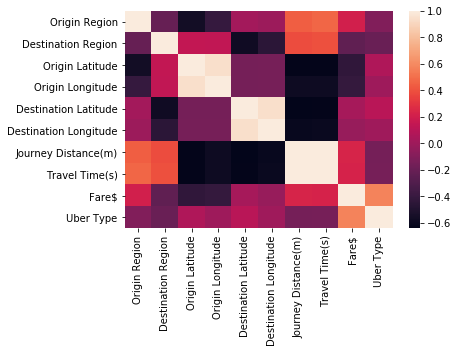

In [119]:
corr_ = mv_df.corr()
sns.heatmap(corr_)

It can be seen here that fare has the strongest relationship with Uber Type, Journey Distance and Travel Time. Hence, it was taken for prediction

In [120]:
cf_df = cf_df[['Uber_ID','Uber Type','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)','Arrival Time','Day Classification','Time Classification','Fare$']]

In [121]:
cf_df.columns = ['Uber_ID', 'Uber_Type', 'Origin_Region', 'Destination_Region',
       'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude',
       'Destination_Longitude', 'Journey_Distance', 'Departure_Date',
       'Departure_Time', 'Travel_Time', 'Arrival_Time','Weekend','Time_Classification','Fare']

In [122]:
mv_df.head()

Uber_ID  Origin Region  Destination Region  Origin Latitude  \
0  3445392301              4                   7       -37.802345   
1  3345795485              2                   7       -37.809074   
2  1532168874              2                   3       -37.816983   
3  3994266090              6                   4       -37.790818   
4  3256811386              7                   1       -37.861835   

   Origin Longitude  Destination Latitude  Destination Longitude  \
0        145.004816            -37.861835             144.905716   
1        144.931605            -37.861835             144.905716   
2        144.931762            -37.818243             144.968375   
3        144.985793            -37.809314             145.019431   
4        144.905716            -37.803026             144.948856   

   Journey Distance(m) Departure Date Departure Time  Travel Time(s)  \
0              12160.0     2018-02-12       11:50:37         3877.80   
1              10944.0     2018-05-02       12:46:44         3545.82   
2               4355.0     2018-07-08       14:26:01         1042.08   
3               4566.0     2018-01-20       17:48:41         1163.70   
4               9994.0     2018-06-20       05:43:38         3297.00   

  Arrival Time Day Classification  Fare$ Time Classification  Uber Type  
0     12:55:14                  0  17.59                   0          1  
1     13:45:49                  0  23.03                   1          1  
2     14:43:23                  1  11.72                   1          0  
3     18:08:04                  1  19.49                   1          1  
4      6:38:35                  0  26.79                   2          1

In [123]:
# renaming columns 
mv_df.columns = ['Uber_ID','Origin_Region','Destination_Region','Origin_Latitude', 'Origin_Longitude', 
                 'Destination_Latitude','Destination_Longitude', 'Journey_Distance', 'Departure_Date',
                 'Departure_Time', 'Travel_Time', 'Arrival_Time','Weekend','Fare','Time_Classification',           
                 'Uber_Type']

In [124]:
# rearranging columns
mv_df = mv_df[['Uber_ID', 'Uber_Type', 'Origin_Region', 'Destination_Region',
       'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude',
       'Destination_Longitude', 'Journey_Distance', 'Departure_Date',
       'Departure_Time', 'Travel_Time', 'Arrival_Time','Weekend','Time_Classification','Fare']]

In [125]:
mv_df.shape

(115, 16)

In [126]:
# creating separate dataframe for complete file based on uber type
ub_id0_data=cf_df[cf_df['Uber_Type'] == 0]
ub_id1_data=cf_df[cf_df['Uber_Type'] == 1]
ub_id2_data=cf_df[cf_df['Uber_Type'] == 2]

In [127]:
# creating separate dataframe for missing value file based on uber type
mv0=mv_df[mv_df['Uber_Type'] == 0]
mv1=mv_df[mv_df['Uber_Type'] == 1]
mv2=mv_df[mv_df['Uber_Type'] == 2]

In [128]:
ub_id0_data.shape

(170, 16)

In [129]:
mv0.shape

(51, 16)

In [130]:
drop_missingv_null = mv_df.copy()
# dropping missing fare values 
drop_missingv_null.dropna(subset=['Fare'], axis=0, inplace = True)
dropped0 = drop_missingv_null[drop_missingv_null.Uber_Type == 0]
dropped1 = drop_missingv_null[drop_missingv_null.Uber_Type == 1]
dropped2 = drop_missingv_null[drop_missingv_null.Uber_Type == 2]

# Prediction of fare for uber type 0

In [131]:
lm1 = LinearRegression()

In [132]:
#fitting drop missing values with columns required 
columns_used = ['Journey_Distance','Travel_Time','Time_Classification','Weekend']
lm1.fit(dropped0[columns_used],dropped0.Fare)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
lm1.predict(mv0[columns_used])

array([11.05640745, 16.64652485, 10.13545124, 10.65990958,  9.84843041,
       11.29603101, 21.69153025,  5.6823122 , 12.85928462,  7.69412341,
        5.96756421, 12.14508381, 23.01261707, 11.21403847, 15.03934894,
       11.45209014, 19.5562883 , 13.09516664, 10.88148136, 13.03201048,
       16.76836616, 10.37662455, 10.86427801, 20.57147575, 14.49752179,
        6.1683403 ,  7.57353241, 19.01272613, 19.18664454,  8.12080113,
       21.09232139,  8.47032806, 10.39247494, 11.2147515 , 14.89390025,
       17.50408136, 16.53035422, 20.5995465 , 11.40365493, 11.67094465,
       11.07729702, 11.26436567, 20.88299483, 17.35860256, 18.05388085,
       26.03855115,  7.54451836, 21.71976517, 13.42791432,  9.93273375,
        6.38998632])

In [134]:
mv0['Fare'][mv0['Fare'].isnull()]= lm1.predict(mv0[columns_used])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [135]:
mv0.head(1)

Uber_ID  Uber_Type  Origin_Region  Destination_Region  Origin_Latitude  \
2  1532168874          0              2                   3       -37.816983   

   Origin_Longitude  Destination_Latitude  Destination_Longitude  \
2        144.931762            -37.818243             144.968375   

   Journey_Distance Departure_Date Departure_Time  Travel_Time Arrival_Time  \
2            4355.0     2018-07-08       14:26:01      1042.08     14:43:23   

  Weekend Time_Classification   Fare  
2       1                   1  11.72

In [136]:
mv_rsq=mv0.drop(['Uber_ID','Origin_Region','Destination_Region','Origin_Latitude','Origin_Longitude','Destination_Latitude','Destination_Longitude','Departure_Date','Departure_Time','Arrival_Time'],axis=1)

In [137]:
X_train, X_test,y_train, y_test = train_test_split(mv_rsq.iloc[:,:-1],mv_rsq.iloc[:,-1:],random_state= 170)

In [138]:
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.9875770312805147


# Prediction of fare for uber type 1

In [139]:
lm2 = LinearRegression()

In [140]:
#fitting drop missing values with columns required 
columns_used = ['Journey_Distance','Travel_Time','Time_Classification','Weekend']
lm2.fit(dropped1[columns_used],dropped1.Fare)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
lm2.predict(mv1[columns_used])

array([18.73165277, 23.07829142, 20.23324823, 27.70394962, 21.58527837,
       56.25907874, 15.07846591, 22.09866827, 18.21777822, 23.17863152,
       21.44233539, 56.08781029, 53.23922022, 23.55520327, 46.06919619,
       55.04267492, 23.07349873, 18.62394228, 25.30077729, 58.28458146,
       28.05534895, 20.50058007, 19.92861542, 12.62430901, 11.80941578,
       26.41061268, 28.42281064, 62.75152104, 43.39682388, 16.98138197,
       15.84694186, 19.69799589, 16.22440582,  7.64509125, 29.93653118,
       23.57225073, 15.68703949, 30.79288503, 22.13098971, 24.79120064,
       18.53158822, 47.43319962, 34.449908  , 16.0637    , 27.15949362,
       18.11478557, 19.30073511,  8.54056923,  7.99001145])

In [142]:
mv1['Fare'][mv1['Fare'].isnull()]= lm2.predict(mv1[columns_used])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [143]:
mv_rsq1=mv1.drop(['Uber_ID','Origin_Region','Destination_Region','Origin_Latitude','Origin_Longitude','Destination_Latitude','Destination_Longitude','Departure_Date','Departure_Time','Arrival_Time'],axis=1)

In [144]:
X_train, X_test,y_train, y_test = train_test_split(mv_rsq1.iloc[:,:-1],mv_rsq1.iloc[:,-1:],random_state= 170)

In [145]:
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.9972447096523052


# Prediction of fare for uber type 2

In [146]:
lm3 = LinearRegression()

In [147]:
#fitting drop missing values with columns required and 
columns_used = ['Journey_Distance','Travel_Time','Time_Classification','Weekend']
lm3.fit(dropped2[columns_used],dropped2.Fare)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
lm3.predict(mv2[columns_used])

array([208.37339808,  95.3537159 , 135.34665519,  66.76870579,
        99.41593094, 120.74732486, 610.19377684, 131.26657116,
       622.99499469,  58.96099999,  59.30096375, 130.41751886,
       205.94622529, 217.04518241, 141.54779704])

In [149]:
mv2['Fare'][mv2['Fare'].isnull()]= lm3.predict(mv2[columns_used])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [150]:
mv_rsq2=mv2.drop(['Uber_ID','Origin_Region','Destination_Region','Origin_Latitude','Origin_Longitude','Destination_Latitude','Destination_Longitude','Departure_Date','Departure_Time','Arrival_Time'],axis=1)

In [151]:
X_train, X_test,y_train, y_test = train_test_split(mv_rsq2.iloc[:,:-1],mv_rsq2.iloc[:,-1:],random_state= 170)

In [152]:
lm_impute = LinearRegression()
lm_impute.fit(X_train,y_train)

print ('r-squared for this model = ',lm_impute.score(X_test,y_test))

r-squared for this model =  0.999954087302128


In [153]:
mv0.head(6)

Uber_ID  Uber_Type  Origin_Region  Destination_Region  Origin_Latitude  \
2   1532168874          0              2                   3       -37.816983   
5   1664439552          0              7                   6       -37.861835   
6   1517194977          0              7                   1       -37.861835   
7   1370281742          0              3                   7       -37.818758   
9   1284738859          0              1                   7       -37.816684   
12  1296407536          0              1                   3       -37.814746   

    Origin_Longitude  Destination_Latitude  Destination_Longitude  \
2         144.931762            -37.818243             144.968375   
5         144.905716            -37.787433             144.980377   
6         144.905716            -37.808067             144.969218   
7         145.006856            -37.861835             144.905716   
9         144.970055            -37.861835             144.905716   
12        144.936048            -37.812166             144.988069   

    Journey_Distance Departure_Date Departure_Time  Travel_Time Arrival_Time  \
2             4355.0     2018-07-08       14:26:01      1042.08     14:43:23   
5            11633.0     2018-07-28       23:37:00      3645.30      0:37:45   
6             9121.0     2018-03-15       14:13:08      3050.82     15:03:58   
7            11239.0     2018-03-23       17:24:04      3558.60     18:23:22   
9             7984.0     2018-02-02       18:44:14      2772.06     19:30:26   
12            5284.0     2018-02-04       20:32:54      1275.60     20:54:09   

   Weekend Time_Classification   Fare  
2        1                   1  11.72  
5        1                   2  16.03  
6        0                   1  10.55  
7        0                   1  10.85  
9        0                   1   9.58  
12       1                   1  10.09

In [154]:
frames = [mv0, mv1, mv2]

In [155]:
result = pd.concat(frames,ignore_index=True)

In [156]:
result.head()

Uber_ID  Uber_Type  Origin_Region  Destination_Region  Origin_Latitude  \
0  1532168874          0              2                   3       -37.816983   
1  1664439552          0              7                   6       -37.861835   
2  1517194977          0              7                   1       -37.861835   
3  1370281742          0              3                   7       -37.818758   
4  1284738859          0              1                   7       -37.816684   

   Origin_Longitude  Destination_Latitude  Destination_Longitude  \
0        144.931762            -37.818243             144.968375   
1        144.905716            -37.787433             144.980377   
2        144.905716            -37.808067             144.969218   
3        145.006856            -37.861835             144.905716   
4        144.970055            -37.861835             144.905716   

   Journey_Distance Departure_Date Departure_Time  Travel_Time Arrival_Time  \
0            4355.0     2018-07-08       14:26:01      1042.08     14:43:23   
1           11633.0     2018-07-28       23:37:00      3645.30      0:37:45   
2            9121.0     2018-03-15       14:13:08      3050.82     15:03:58   
3           11239.0     2018-03-23       17:24:04      3558.60     18:23:22   
4            7984.0     2018-02-02       18:44:14      2772.06     19:30:26   

  Weekend Time_Classification   Fare  
0       1                   1  11.72  
1       1                   2  16.03  
2       0                   1  10.55  
3       0                   1  10.85  
4       0                   1   9.58

In [157]:
# rearranging columns
result = result[['Uber_ID', 'Uber_Type', 'Origin_Region', 'Destination_Region',
       'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude',
       'Destination_Longitude', 'Journey_Distance', 'Departure_Date',
       'Departure_Time', 'Travel_Time', 'Arrival_Time','Weekend','Time_Classification','Fare']]

In [158]:
result

Uber_ID  Uber_Type  Origin_Region  Destination_Region  \
0    1532168874          0              2                   3   
1    1664439552          0              7                   6   
2    1517194977          0              7                   1   
3    1370281742          0              3                   7   
4    1284738859          0              1                   7   
..          ...        ...            ...                 ...   
110  5309315737          2              1                   5   
111  5275181382          2              4                   5   
112  5510572108          2              3                   7   
113  5491201085          2              7                   5   
114  5702412931          2              2                   6   

     Origin_Latitude  Origin_Longitude  Destination_Latitude  \
0         -37.816983        144.931762            -37.818243   
1         -37.861835        144.905716            -37.787433   
2         -37.861835        144.905716            -37.808067   
3         -37.818758        145.006856            -37.861835   
4         -37.816684        144.970055            -37.861835   
..               ...               ...                   ...   
110       -37.813024        144.935304            -37.798871   
111       -37.803832        145.005647            -37.812958   
112       -37.824998        144.998040            -37.861835   
113       -37.861835        144.905716            -37.803651   
114       -37.814958        144.927531            -37.790797   

     Destination_Longitude  Journey_Distance Departure_Date Departure_Time  \
0               144.968375            4355.0     2018-07-08       14:26:01   
1               144.980377           11633.0     2018-07-28       23:37:00   
2               144.969218            9121.0     2018-03-15       14:13:08   
3               144.905716           11239.0     2018-03-23       17:24:04   
4               144.905716            7984.0     2018-02-02       18:44:14   
..                     ...               ...            ...            ...   
110             144.919834            3568.0     2018-02-01       09:33:45   
111             144.933682            8018.0     2018-06-12       11:19:07   
112             144.905716           10104.0     2018-03-07       13:23:36   
113             144.936595           10767.0     2018-04-01       07:25:50   
114             144.985865            8010.0     2018-01-13       10:37:45   

     Travel_Time Arrival_Time Weekend Time_Classification        Fare  
0        1042.08     14:43:23       1                   1   11.720000  
1        3645.30      0:37:45       1                   2   16.030000  
2        3050.82     15:03:58       0                   1   10.550000  
3        3558.60     18:23:22       0                   1   10.850000  
4        2772.06     19:30:26       0                   1    9.580000  
..           ...          ...     ...                 ...         ...  
110       822.36      9:47:27       0                   0   59.300964  
111      2063.04     11:53:30       0                   0  130.320000  
112      3212.40     14:17:08       0                   1  206.200000  
113      3472.38      8:23:42       1                   0  217.220000  
114      2158.32     11:13:43       1                   0  141.547797  

[115 rows x 16 columns]

In [159]:
result_value = pd.read_csv('25510487_missing_value.csv')

In [160]:
for i in range(len(result)):
    for j in range(len(result)):
        if result_value['Unnamed: 0'][i]=='ID'+str(result['Uber_ID'][j]):
            result_value['Fare$'][i]=result['Fare'][j]
            result_value['Uber Type'][i]=result['Uber_Type'][j]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [161]:
result_value.head()

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID3445392301        1.0              4                   7   
1  ID3345795485        1.0              2                   7   
2  ID1532168874        0.0              2                   3   
3  ID3994266090        1.0              6                   4   
4  ID3256811386        1.0              7                   1   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.802345        145.004816            -37.861835   
1       -37.809074        144.931605            -37.861835   
2       -37.816983        144.931762            -37.818243   
3       -37.790818        144.985793            -37.809314   
4       -37.861835        144.905716            -37.803026   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.905716              12160.0     2018-02-12       11:50:37   
1             144.905716              10944.0     2018-05-02       12:46:44   
2             144.968375               4355.0     2018-07-08       14:26:01   
3             145.019431               4566.0     2018-01-20       17:48:41   
4             144.948856               9994.0     2018-06-20       05:43:38   

   Travel Time(s) Arrival Time  Fare$  
0         3877.80     12:55:14  17.59  
1         3545.82     13:45:49  23.03  
2         1042.08     14:43:23  11.72  
3         1163.70     18:08:04  19.49  
4         3297.00      6:38:35  26.79

In [162]:
result_value.to_csv('25510487.missing_value_solution.csv')

## Conclusion

Fares and uber types were predicted from cleaned data and has resulted in a high R score computation of 95% and above. This measures the accuracy of the predicted value inputted into the missing position

## OUTLIERS FILE

The following steps are done for this file:
1. Building linear regression model based on missing data (without nulls) and dirty data.
2. Using this model to compute fares for the outliers according to each uber type.
3. Calculated fare residuals which is done by subtracting fare with predicted fare
4. Identifying outliers through IQR and sigma outlier function
5. Dropping outliers





Step 2) Using this model compute fares for the outliers according to each uber type.
Step 3) Then find the difference between the outliers fare and computed outliers fare, which will give you the residuals for eahh uber type.
Step 4) Then make box plots.
Step 5) Set benchmarks according to the model, basically find the mean and standard deviation or the quartile ranges using   missing data and dirty data (merged data set you used to build the model) for each uber type.
Step 6) whatever is outside the benchmark it's an outlier for the residuals.
The residuals are basically = Actual fare - predicted fare.

In [167]:
outlier_data = pd.read_csv('outliers.csv')

In [168]:
outlier_data.head()

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
0           0  ID1811817915          0              7                   8   
1           1  ID5138100187          2              7                   3   
2           2  ID1579492329          0              2                   7   
3           3  ID1745461304          0              4                   5   
4           4  ID5536340055          2              2                   9   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.815834   
1       -37.861835        144.905716            -37.823859   
2       -37.814123        144.939710            -37.861835   
3       -37.807292        144.997268            -37.805972   
4       -37.815486        144.935486            -38.110916   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             145.046450              15151.0     2018-02-02       06:45:23   
1             144.969892               8042.0     2018-02-15       08:02:37   
2             144.905716              10158.0     2018-04-22       03:53:09   
3             144.934083               5960.0     2018-04-16       07:31:45   
4             144.654173              42828.0     2018-07-15       07:29:05   

   Travel Time(s) Arrival Time   Fare$  
0         4911.60      8:07:14   11.19  
1         2796.00      8:49:13  260.23  
2         3343.50      4:48:52   18.15  
3         1532.40      7:57:17    4.12  
4        10305.18     10:20:50  931.73

In [169]:
outlier_col = outlier_data.copy()

In [170]:
outlier_col.rename(index=str, columns={"Unnamed: 0.1" : 'Uber_ID'}, inplace = True)
outlier_col.drop(['Unnamed: 0'], axis=1, inplace = True)

In [171]:
outlier_col

Uber_ID  Uber Type  Origin Region  Destination Region  \
0    ID1811817915          0              7                   8   
1    ID5138100187          2              7                   3   
2    ID1579492329          0              2                   7   
3    ID1745461304          0              4                   5   
4    ID5536340055          2              2                   9   
..            ...        ...            ...                 ...   
103  ID1492559905          0              4                   8   
104  ID1273259066          0              1                   5   
105  ID3950747958          1              5                   4   
106  ID3991574276          1              4                   5   
107  ID3126710107          1              9                   1   

     Origin Latitude  Origin Longitude  Destination Latitude  \
0         -37.861835        144.905716            -37.815834   
1         -37.861835        144.905716            -37.823859   
2         -37.814123        144.939710            -37.861835   
3         -37.807292        144.997268            -37.805972   
4         -37.815486        144.935486            -38.110916   
..               ...               ...                   ...   
103       -37.816091        145.009424            -37.807202   
104       -37.803425        144.964913            -37.806213   
105       -37.814223        144.932832            -37.804051   
106       -37.799444        144.989061            -37.800015   
107       -38.110916        144.654173            -37.813278   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0               145.046450              15151.0     2018-02-02       06:45:23   
1               144.969892               8042.0     2018-02-15       08:02:37   
2               144.905716              10158.0     2018-04-22       03:53:09   
3               144.934083               5960.0     2018-04-16       07:31:45   
4               144.654173              42828.0     2018-07-15       07:29:05   
..                     ...                  ...            ...            ...   
103             145.026637               2674.0     2018-01-01       12:35:41   
104             144.939732               3630.0     2018-07-25       20:38:55   
105             145.005367               7811.0     2018-04-09       16:03:31   
106             144.935183               6631.0     2018-01-07       20:49:26   
107             144.965439              43569.0     2018-06-15       12:16:43   

     Travel Time(s) Arrival Time    Fare$  
0           4911.60      8:07:14   11.190  
1           2796.00      8:49:13  260.230  
2           3343.50      4:48:52   18.150  
3           1532.40      7:57:17    4.120  
4          10305.18     10:20:50  931.730  
..              ...          ...      ...  
103          621.30     12:46:02    7.020  
104          819.18     20:52:34    4.815  
105         2033.34     16:37:24    9.785  
106         1672.38     21:17:18   23.140  
107        10466.10     15:11:09   60.560  

[108 rows x 14 columns]

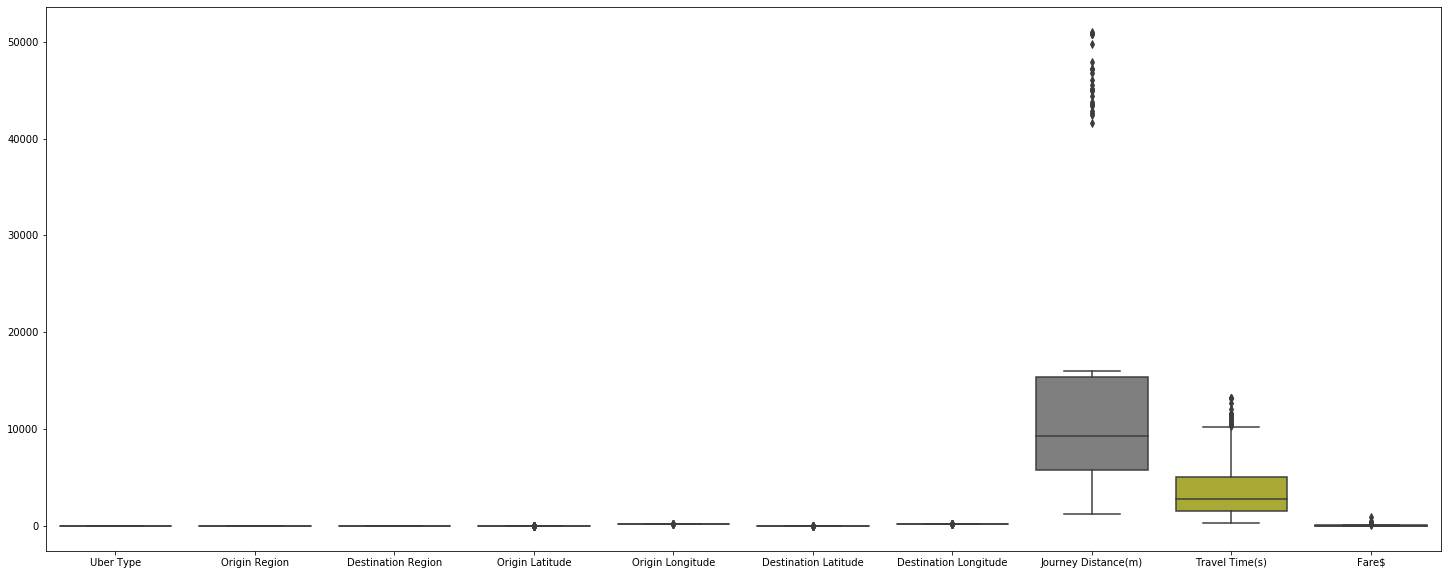

In [172]:
plt.figure(figsize=(25,10))
bp = sns.boxplot(data = outlier_col)

In [173]:
outlier_col.head(1)

Uber_ID  Uber Type  Origin Region  Destination Region  \
0  ID1811817915          0              7                   8   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.815834   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0              145.04645              15151.0     2018-02-02       06:45:23   

   Travel Time(s) Arrival Time  Fare$  
0          4911.6      8:07:14  11.19

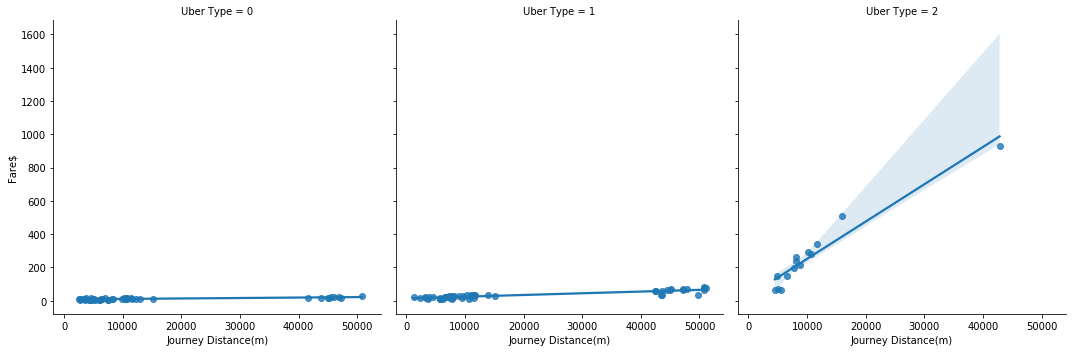

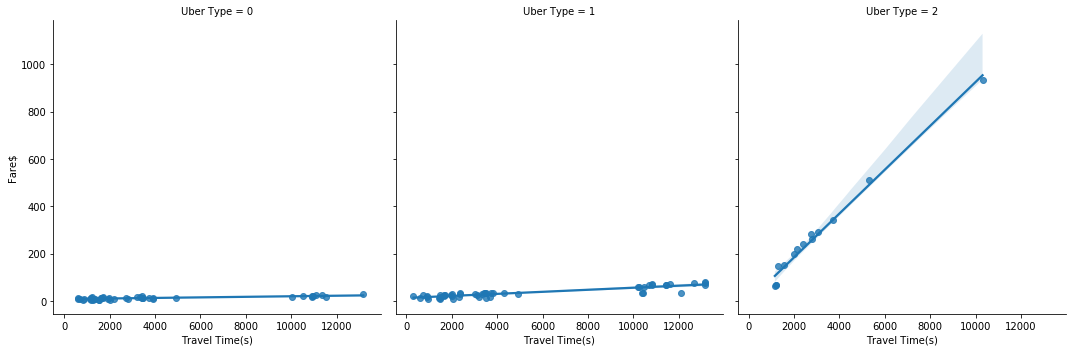

In [174]:
sns.lmplot('Journey Distance(m)','Fare$', col = 'Uber Type',data = outlier_col);
sns.lmplot('Travel Time(s)','Fare$', col = 'Uber Type',data = outlier_col);

In [175]:
outlier_col['Time Classification'] = ''

In [176]:
# creating classification for timing
for i in range(len(outlier_col['Departure Time'])):
    time1 = str(outlier_col['Departure Time'][i]).split(':')
    if 6 <= int(time1[0]) <= 11 and 0 <= int(time1[1]) <= 59 and 0 <= int(time1[2]) <= 59:
        outlier_col['Time Classification'][i] = 0
    elif 12 <= int(time1[0]) <= 20 and 0 <= int(time1[1]) <= 59 and 0 <= int(time1[2]) <= 59:
        outlier_col['Time Classification'][i] = 1
    else:
        outlier_col['Time Classification'][i] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [177]:
# creating classification for weekend
outlier_col['Day Classification'] = ''
for i in range(len(outlier_col)):
    dt=outlier_col['Departure Date'][i]
    year,month,day = (int(x) for x in dt.split('-'))
    ans = datetime.date(year, month, day).weekday()
    if ans == 5 or ans == 6:
        outlier_col['Day Classification'][i] = 1
    else:
        outlier_col['Day Classification'][i] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
outlier_col.head()

Uber_ID  Uber Type  Origin Region  Destination Region  \
0  ID1811817915          0              7                   8   
1  ID5138100187          2              7                   3   
2  ID1579492329          0              2                   7   
3  ID1745461304          0              4                   5   
4  ID5536340055          2              2                   9   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.861835        144.905716            -37.815834   
1       -37.861835        144.905716            -37.823859   
2       -37.814123        144.939710            -37.861835   
3       -37.807292        144.997268            -37.805972   
4       -37.815486        144.935486            -38.110916   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             145.046450              15151.0     2018-02-02       06:45:23   
1             144.969892               8042.0     2018-02-15       08:02:37   
2             144.905716              10158.0     2018-04-22       03:53:09   
3             144.934083               5960.0     2018-04-16       07:31:45   
4             144.654173              42828.0     2018-07-15       07:29:05   

   Travel Time(s) Arrival Time   Fare$ Time Classification Day Classification  
0         4911.60      8:07:14   11.19                   0                  0  
1         2796.00      8:49:13  260.23                   0                  0  
2         3343.50      4:48:52   18.15                   2                  1  
3         1532.40      7:57:17    4.12                   0                  0  
4        10305.18     10:20:50  931.73                   0                  1

In [179]:
uber0=outlier_col[outlier_col['Uber Type'] == 0]
uber1=outlier_col[outlier_col['Uber Type'] == 1]
uber2=outlier_col[outlier_col['Uber Type'] == 2]

In [180]:
prediction = ['Journey Distance(m)','Travel Time(s)','Time Classification','Day Classification']

In [181]:
# creating new column of predicted fare
uber0['fare'] = lm1.predict(uber0[prediction])
uber1['fare'] = lm2.predict(uber1[prediction])
uber2['fare'] = lm3.predict(uber2[prediction])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [182]:
# merging dataframes
merged_out = pd.concat([uber0, uber1, uber2])


In [183]:
merged_out

Uber_ID  Uber Type  Origin Region  Destination Region  \
0   ID1811817915          0              7                   8   
2   ID1579492329          0              2                   7   
3   ID1745461304          0              4                   5   
5   ID1869292694          0              4                   7   
6   ID1165633155          0              2                   9   
..           ...        ...            ...                 ...   
61  ID5257891857          2              6                   7   
71  ID5589454344          2              8                   6   
80  ID5519258043          2              6                   5   
86  ID5903194798          2              5                   4   
99  ID5693083253          2              4                   2   

    Origin Latitude  Origin Longitude  Destination Latitude  \
0        -37.861835        144.905716            -37.815834   
2        -37.814123        144.939710            -37.861835   
3        -37.807292        144.997268            -37.805972   
5        -37.807410        145.010535            -37.861835   
6        -37.817889        144.946281            -38.110916   
..              ...               ...                   ...   
61       -37.773803        144.983647            -37.861835   
71       -37.815834        145.046450            -37.773845   
80       -37.773803        144.983647            -37.806656   
86       -37.799764        144.935714            -37.811689   
99       -37.805026        144.996069            -37.817749   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0              145.046450              15151.0     2018-02-02       06:45:23   
2              144.905716              10158.0     2018-04-22       03:53:09   
3              144.934083               5960.0     2018-04-16       07:31:45   
5              144.905716              12342.0     2018-05-16       08:48:26   
6              144.654173              41587.0     2018-01-01       10:14:01   
..                    ...                  ...            ...            ...   
61             144.905716              16033.0     2018-04-28       04:35:21   
71             144.983689              10698.0     2018-07-14       04:46:12   
80             144.932733              10195.0     2018-06-24       07:03:05   
86             145.000941               8806.0     2018-03-05       21:59:25   
99             144.948532               5074.0     2018-02-16       23:17:12   

    Travel Time(s) Arrival Time   Fare$ Time Classification  \
0          4911.60      8:07:14   11.19                   0   
2          3343.50      4:48:52   18.15                   2   
3          1532.40      7:57:17    4.12                   0   
5          3906.66      9:53:32    8.11                   0   
6         10011.84     13:00:52   15.81                   0   
..             ...          ...     ...                 ...   
61         5323.56      6:04:04  508.79                   2   
71         2735.16      5:31:47  280.95                   2   
80         3073.38      7:54:18  291.44                   0   
86         2137.68     22:35:02  217.71                   2   
99         1226.34     23:37:38   68.84                   2   

   Day Classification        fare  
0                   0    8.971185  
2                   1   16.327293  
3                   0    5.651579  
5                   0    7.981335  
6                   0   14.418521  
..                ...         ...  
61                  1  342.208345  
71                  1  193.487088  
80                  1  194.097554  
86                  0  153.579206  
99                  0  101.381985  

[108 rows x 17 columns]

In [184]:
# renaming columns
merged_out.columns = ['Uber_ID','Uber_Type', 'Origin_Region', 'Destination_Region',
       'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude',
       'Destination_Longitude', 'Journey_Distance', 'Departure_Date',
       'Departure_Time', 'Travel_Time', 'Arrival_Time', 'Fare','Time_Classification','Day Classification',
                     'Fare_predict']

In [185]:
merged_out.head()

Uber_ID  Uber_Type  Origin_Region  Destination_Region  \
0  ID1811817915          0              7                   8   
2  ID1579492329          0              2                   7   
3  ID1745461304          0              4                   5   
5  ID1869292694          0              4                   7   
6  ID1165633155          0              2                   9   

   Origin_Latitude  Origin_Longitude  Destination_Latitude  \
0       -37.861835        144.905716            -37.815834   
2       -37.814123        144.939710            -37.861835   
3       -37.807292        144.997268            -37.805972   
5       -37.807410        145.010535            -37.861835   
6       -37.817889        144.946281            -38.110916   

   Destination_Longitude  Journey_Distance Departure_Date Departure_Time  \
0             145.046450           15151.0     2018-02-02       06:45:23   
2             144.905716           10158.0     2018-04-22       03:53:09   
3             144.934083            5960.0     2018-04-16       07:31:45   
5             144.905716           12342.0     2018-05-16       08:48:26   
6             144.654173           41587.0     2018-01-01       10:14:01   

   Travel_Time Arrival_Time   Fare Time_Classification Day Classification  \
0      4911.60      8:07:14  11.19                   0                  0   
2      3343.50      4:48:52  18.15                   2                  1   
3      1532.40      7:57:17   4.12                   0                  0   
5      3906.66      9:53:32   8.11                   0                  0   
6     10011.84     13:00:52  15.81                   0                  0   

   Fare_predict  
0      8.971185  
2     16.327293  
3      5.651579  
5      7.981335  
6     14.418521

In [186]:
merged_out['fare_residuals'] = round((merged_out.Fare - merged_out.Fare_predict),2)

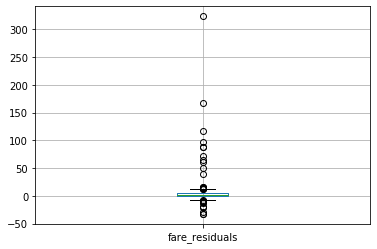

In [187]:
merged_out.boxplot(column ="fare_residuals")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26232210>]],
      dtype=object)

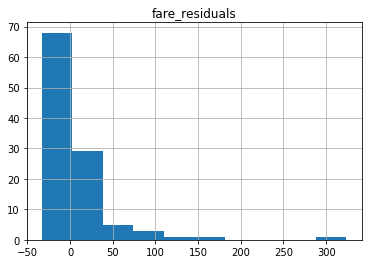

In [188]:
merged_out.hist(column="fare_residuals")

In [189]:
#Function to identify residual outliers index using inter-quartile-range method

def IQR_outlier(a, c):
    q1 = a[c].quantile(0.25)
    q3 = a[c].quantile(0.75)
    diff = q3 - q1
    outlier = a.loc[(a[c] < (q1 - 1.5 * diff)) | (a[c] > (q3 + 1.5 * diff))]
    return outlier.index

In [190]:
# Function to identify outliers for each Uber_Type by IQR method
def sig_outlier(a,c):
    std = a[c].std()
    median = a[c].median()
    outlier = a.loc[np.absolute(a[c] - median) > 3*std]
    return outlier.index

In [191]:
print("Outliers for Uber Type 0 using IQR :", len(merged_out.loc[IQR_outlier(merged_out[merged_out.Uber_Type==0],'fare_residuals')]))
print("Outliers for Uber_Type 1 using IQR :", len(merged_out.loc[IQR_outlier(merged_out[merged_out.Uber_Type==1],'fare_residuals')]))
print("Outliers for Uber_Type 2 using IQR :", len(merged_out.loc[IQR_outlier(merged_out[merged_out.Uber_Type==2],'fare_residuals')]))

Outliers for Uber Type 0 using IQR : 1
Outliers for Uber_Type 1 using IQR : 3
Outliers for Uber_Type 2 using IQR : 1


In [192]:
print("Outliers for Uber Type 0 using 3-sigma :", len(merged_out.loc[sig_outlier(merged_out[merged_out.Uber_Type==0],'fare_residuals')]))
print("Outliers for Uber Type 1 using 3-sigma :", len(merged_out.loc[sig_outlier(merged_out[merged_out.Uber_Type==1],'fare_residuals')]))
print("Outliers for Uber Type 2 using 3-sigma :", len(merged_out.loc[sig_outlier(merged_out[merged_out.Uber_Type==2],'fare_residuals')]))

Outliers for Uber Type 0 using 3-sigma : 0
Outliers for Uber Type 1 using 3-sigma : 0
Outliers for Uber Type 2 using 3-sigma : 0


In [193]:
# dropping outliers
cleaned_outlier = pd.concat([merged_out[merged_out.Uber_Type==0].drop(IQR_outlier(merged_out[merged_out.Uber_Type==0],'fare_residuals')), \
           merged_out[merged_out.Uber_Type==1].drop(IQR_outlier(merged_out[merged_out.Uber_Type==1],'fare_residuals')), \
           merged_out[merged_out.Uber_Type==2].drop(IQR_outlier(merged_out[merged_out.Uber_Type==2],'fare_residuals'))])


In [194]:
cleaned_outlier

Uber_ID  Uber_Type  Origin_Region  Destination_Region  \
0   ID1811817915          0              7                   8   
2   ID1579492329          0              2                   7   
3   ID1745461304          0              4                   5   
5   ID1869292694          0              4                   7   
6   ID1165633155          0              2                   9   
..           ...        ...            ...                 ...   
61  ID5257891857          2              6                   7   
71  ID5589454344          2              8                   6   
80  ID5519258043          2              6                   5   
86  ID5903194798          2              5                   4   
99  ID5693083253          2              4                   2   

    Origin_Latitude  Origin_Longitude  Destination_Latitude  \
0        -37.861835        144.905716            -37.815834   
2        -37.814123        144.939710            -37.861835   
3        -37.807292        144.997268            -37.805972   
5        -37.807410        145.010535            -37.861835   
6        -37.817889        144.946281            -38.110916   
..              ...               ...                   ...   
61       -37.773803        144.983647            -37.861835   
71       -37.815834        145.046450            -37.773845   
80       -37.773803        144.983647            -37.806656   
86       -37.799764        144.935714            -37.811689   
99       -37.805026        144.996069            -37.817749   

    Destination_Longitude  Journey_Distance Departure_Date Departure_Time  \
0              145.046450           15151.0     2018-02-02       06:45:23   
2              144.905716           10158.0     2018-04-22       03:53:09   
3              144.934083            5960.0     2018-04-16       07:31:45   
5              144.905716           12342.0     2018-05-16       08:48:26   
6              144.654173           41587.0     2018-01-01       10:14:01   
..                    ...               ...            ...            ...   
61             144.905716           16033.0     2018-04-28       04:35:21   
71             144.983689           10698.0     2018-07-14       04:46:12   
80             144.932733           10195.0     2018-06-24       07:03:05   
86             145.000941            8806.0     2018-03-05       21:59:25   
99             144.948532            5074.0     2018-02-16       23:17:12   

    Travel_Time Arrival_Time    Fare Time_Classification Day Classification  \
0       4911.60      8:07:14   11.19                   0                  0   
2       3343.50      4:48:52   18.15                   2                  1   
3       1532.40      7:57:17    4.12                   0                  0   
5       3906.66      9:53:32    8.11                   0                  0   
6      10011.84     13:00:52   15.81                   0                  0   
..          ...          ...     ...                 ...                ...   
61      5323.56      6:04:04  508.79                   2                  1   
71      2735.16      5:31:47  280.95                   2                  1   
80      3073.38      7:54:18  291.44                   0                  1   
86      2137.68     22:35:02  217.71                   2                  0   
99      1226.34     23:37:38   68.84                   2                  0   

    Fare_predict  fare_residuals  
0       8.971185            2.22  
2      16.327293            1.82  
3       5.651579           -1.53  
5       7.981335            0.13  
6      14.418521            1.39  
..           ...             ...  
61    342.208345          166.58  
71    193.487088           87.46  
80    194.097554           97.34  
86    153.579206           64.13  
99    101.381985          -32.54  

[103 rows x 18 columns]

In [195]:
cleaned_outlier = cleaned_outlier.drop(columns=['Day Classification','Time_Classification', 'Fare_predict', 'fare_residuals'], axis=1)


In [196]:
cleaned_outlier

Uber_ID  Uber_Type  Origin_Region  Destination_Region  \
0   ID1811817915          0              7                   8   
2   ID1579492329          0              2                   7   
3   ID1745461304          0              4                   5   
5   ID1869292694          0              4                   7   
6   ID1165633155          0              2                   9   
..           ...        ...            ...                 ...   
61  ID5257891857          2              6                   7   
71  ID5589454344          2              8                   6   
80  ID5519258043          2              6                   5   
86  ID5903194798          2              5                   4   
99  ID5693083253          2              4                   2   

    Origin_Latitude  Origin_Longitude  Destination_Latitude  \
0        -37.861835        144.905716            -37.815834   
2        -37.814123        144.939710            -37.861835   
3        -37.807292        144.997268            -37.805972   
5        -37.807410        145.010535            -37.861835   
6        -37.817889        144.946281            -38.110916   
..              ...               ...                   ...   
61       -37.773803        144.983647            -37.861835   
71       -37.815834        145.046450            -37.773845   
80       -37.773803        144.983647            -37.806656   
86       -37.799764        144.935714            -37.811689   
99       -37.805026        144.996069            -37.817749   

    Destination_Longitude  Journey_Distance Departure_Date Departure_Time  \
0              145.046450           15151.0     2018-02-02       06:45:23   
2              144.905716           10158.0     2018-04-22       03:53:09   
3              144.934083            5960.0     2018-04-16       07:31:45   
5              144.905716           12342.0     2018-05-16       08:48:26   
6              144.654173           41587.0     2018-01-01       10:14:01   
..                    ...               ...            ...            ...   
61             144.905716           16033.0     2018-04-28       04:35:21   
71             144.983689           10698.0     2018-07-14       04:46:12   
80             144.932733           10195.0     2018-06-24       07:03:05   
86             145.000941            8806.0     2018-03-05       21:59:25   
99             144.948532            5074.0     2018-02-16       23:17:12   

    Travel_Time Arrival_Time    Fare  
0       4911.60      8:07:14   11.19  
2       3343.50      4:48:52   18.15  
3       1532.40      7:57:17    4.12  
5       3906.66      9:53:32    8.11  
6      10011.84     13:00:52   15.81  
..          ...          ...     ...  
61      5323.56      6:04:04  508.79  
71      2735.16      5:31:47  280.95  
80      3073.38      7:54:18  291.44  
86      2137.68     22:35:02  217.71  
99      1226.34     23:37:38   68.84  

[103 rows x 14 columns]

In [197]:
cleaned_outlier = cleaned_outlier.reset_index(drop=True)

In [198]:
cleaned_outlier

Uber_ID  Uber_Type  Origin_Region  Destination_Region  \
0    ID1811817915          0              7                   8   
1    ID1579492329          0              2                   7   
2    ID1745461304          0              4                   5   
3    ID1869292694          0              4                   7   
4    ID1165633155          0              2                   9   
..            ...        ...            ...                 ...   
98   ID5257891857          2              6                   7   
99   ID5589454344          2              8                   6   
100  ID5519258043          2              6                   5   
101  ID5903194798          2              5                   4   
102  ID5693083253          2              4                   2   

     Origin_Latitude  Origin_Longitude  Destination_Latitude  \
0         -37.861835        144.905716            -37.815834   
1         -37.814123        144.939710            -37.861835   
2         -37.807292        144.997268            -37.805972   
3         -37.807410        145.010535            -37.861835   
4         -37.817889        144.946281            -38.110916   
..               ...               ...                   ...   
98        -37.773803        144.983647            -37.861835   
99        -37.815834        145.046450            -37.773845   
100       -37.773803        144.983647            -37.806656   
101       -37.799764        144.935714            -37.811689   
102       -37.805026        144.996069            -37.817749   

     Destination_Longitude  Journey_Distance Departure_Date Departure_Time  \
0               145.046450           15151.0     2018-02-02       06:45:23   
1               144.905716           10158.0     2018-04-22       03:53:09   
2               144.934083            5960.0     2018-04-16       07:31:45   
3               144.905716           12342.0     2018-05-16       08:48:26   
4               144.654173           41587.0     2018-01-01       10:14:01   
..                     ...               ...            ...            ...   
98              144.905716           16033.0     2018-04-28       04:35:21   
99              144.983689           10698.0     2018-07-14       04:46:12   
100             144.932733           10195.0     2018-06-24       07:03:05   
101             145.000941            8806.0     2018-03-05       21:59:25   
102             144.948532            5074.0     2018-02-16       23:17:12   

     Travel_Time Arrival_Time    Fare  
0        4911.60      8:07:14   11.19  
1        3343.50      4:48:52   18.15  
2        1532.40      7:57:17    4.12  
3        3906.66      9:53:32    8.11  
4       10011.84     13:00:52   15.81  
..           ...          ...     ...  
98       5323.56      6:04:04  508.79  
99       2735.16      5:31:47  280.95  
100      3073.38      7:54:18  291.44  
101      2137.68     22:35:02  217.71  
102      1226.34     23:37:38   68.84  

[103 rows x 14 columns]

In [199]:
cleaned_outlier.to_csv("outlier_data_solution.csv")